Tornatora Raffaele  
Mat. 786357  
1 Febbraio 2019

# PROGETTO DI TEXT MINING AND SEARCH

## VIDEOGAME'S REVIEWS CLUSTERING

Script del progetto di Text Mining and Search

## LIBRERIE

In questa prima parte vengono caricate tutte le librerie e i moduli che verranno utilizzati.

In [1]:
# Per l'importazione dei dati
import pandas as pd
import gzip

# Per mostrare il tempo impiegato durante le varie operazioni
from time import time

# Per le fasi di pre-processing
import nltk
import string
import re

# Per la rappresentazione del testo
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import numpy as np

# Per gli algoritmi di clustering
from sklearn import cluster
# Per il Gaussian EM Model
from sklearn.mixture import GaussianMixture
# Per il salvataggio dei modelli dopo il fitting
from sklearn.externals import joblib

# Per le metriche di valutazione dei modelli
from sklearn import metrics
import matplotlib.pyplot as plt

# Per le analisi sui clusters
from wordcloud import WordCloud

In [2]:
# Impostazione per matplotlib che permette di visualizzare i grafici inline
%matplotlib inline

## ESTRAZIONE ED ESPLORAZIONE DEI DATI

In questa sezione viene caricato il dataset con un codice fornito dai creatori del dataset; poi viene visualizzato per poterlo esplorare. Infine viene creato il corpus, ovvero il testo da analizzare.

### Estrazione del dataset di reviews

In [3]:
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)
        
def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [4]:
t0 = time()

base_path = './dataset/reviews_Video_Games_5.json.gz'
df = getDF(base_path)

print("Dati importanti in %0.3f secondi" % (time()-t0))

Dati importanti in 14.950 secondi


### Esplorazione del dataset

In [5]:
df

reviewerID        asin                         reviewerName  \
0       A2HD75EMZR8QLN  0700099867                                  123   
1       A3UR8NLLY1ZHCX  0700099867   Alejandro Henao "Electronic Junky"   
2       A1INA0F5CWW3J4  0700099867           Amazon Shopper "Mr.Repsol"   
3       A1DLMTOTHQ4AST  0700099867                             ampgreen   
4       A361M14PU2GUEG  0700099867         Angry Ryan "Ryan A. Forrest"   
5       A2UTRVO4FDCBH6  0700099867                               A.R.G.   
6        AN3YYDZAS3O1Y  0700099867                                  Bob   
7        AQTC623NCESZW  0700099867                        Chesty Puller   
8       A1QJJU33VNC4S7  0700099867                               D@rkFX   
9       A2JLT2WY0F2HVI  0700099867                        D. Sweetapple   
10      A38NXTZUFB1O2K  0700099867                                 FiSH   
11       ANW6EGY12V5XS  0700099867                          Henri Savin   
12       AHT34BRYFBFT1  0700099867                               hewimp   
13      A248LSBZT4P38V  0700099867                    Joseph R. Kennedy   
14       AFS6WERAP409A  0700099867            Lisa Gamuciello "Lisa G."   
15      A14L115LBOB0A5  0700099867                        MotoRider42HC   
16       A20DRRKAN5Z9Q  0700099867                            Moviedude   
17      A2VYL51WQXC5KK  0700099867                     Old-Lumens "O-L"   
18      A10AYT89XSCE46  0700099867                         Paulo Coelho   
19      A29KT7UP7DLM1J  0700099867                         Peter Ostman   
20      A15PIAQT55GNCA  0700099867                     Suk W. Yu "alan"   
21      A18YFCLL3GBD0T  0700099867                              Tara T.   
22      A1BHRNLW2L8KLD  0700099867                            T. Hanson   
23      A1CB8HH9YJ2YZE  0700099867                             TheITMan   
24      A2LQCBLLJVVR5T  0700099867                     Timmiley "Tim M"   
25      A37M0B3NHDHN9V  6050036071                             Fernando   
26      A2QQ9KSQ44QZSE  6050036071                       Javier Miranda   
27      A2PJOSU5ND84S1  6050036071                           LaTavia E.   
28       A91BVZEDZYEWW  6050036071              MP06011999 "RESEARCHER"   
29      A1PH1BOQGD7SCA  6050036071                                  Pam   
...                ...         ...                                  ...   
231750  A1ZR8AIM298DFT  B00KAI3KW2          Edward Nigma "TheEnigma313"   
231751   AKCXS6JVW6E8L  B00KAI3KW2                          Edward Orde   
231752   A31ARER1KVHZB  B00KAI3KW2  Edward W. Osorio "Raven_Knightwing"   
231753  A10584T58O3B5Y  B00KAI3KW2                               Eric L   
231754  A3E89VW74Z8TK8  B00KAI3KW2                         FallenSphinx   
231755  A1DDGFYGFY6TDC  B00KAI3KW2                     Gino Taglialucci   
231756  A1ZE1LPZHGG1QP  B00KAI3KW2                              Gym Cop   
231757   A3Q4NULWZU3RI  B00KAI3KW2                            Jason Sum   
231758  A2JGUR1STLMXZT  B00KAI3KW2                                 JLee   
231759   AQOFQWJYJRA5W  B00KAI3KW2                                 Lemo   
231760  A2YSY26ZVMNNV2  B00KAI3KW2                         Marcus Fenix   
231761  A2VCOIPPA48ICC  B00KAI3KW2                 Miyo Kitano "Kitten"   
231762  A1GT9H5GAYR3F0  B00KAI3KW2                             MoeStuff   
231763  A26EF0FFHL68HP  B00KAI3KW2                      mvp039 "MVP039"   
231764  A3RPNJODORTLRB  B00KAI3KW2                               Nasahr   
231765  A1XNZ7PCE45KK7  B00KAI3KW2                              Ogr8ys1   
231766  A25NSTXNN16KG8  B00KAI3KW2   Redmond Jackson "Redmond Original"   
231767  A37T2MU6L4521N  B00KAI3KW2                        Scott Johnson   
231768  A3D8VPZNKYIAP0  B00KAI3KW2                      Slain Valhallan   
231769   AJQB6I00X8WAI  B00KAI3KW2                            SmokeyNYY   
231770  A1MHB1HRR6VPEH  B00KAI3KW2                            Stephanie   
231771  A2IGEPJJYKMOWK  B00KAI3KW2   

In [6]:
print("Le dimensioni del dataset sono: %i x %i" %(df.shape[0], df.shape[1]))
print("Il tipo delle variabili sono:")
print(df.dtypes)

Le dimensioni del dataset sono: 231780 x 9
Il tipo delle variabili sono:
reviewerID         object
asin               object
reviewerName       object
helpful            object
reviewText         object
overall           float64
summary            object
unixReviewTime      int64
reviewTime         object
dtype: object


Il dataset contiene 231780 recensioni e 9 attributi:
+    reviewerID: l'ID del recensore, di tipo object;
+    asin: l'ID Amazon del prodotto, di tipo object;
+    reviewerName: il nickname del recensore, di tipo object;
+    helpful: il grado di gradimento della recensione, di tipo object;
+    reviewText: il testo della recensione, di tipo object;
+    overall: la valutazione del prodotto, in un range da 0 a 5 a passi di 0.5, di tipo float64;
+    summary: una sintesi della recensione, di tipo object;
+    unixReviewTime: la data di pubblicazione della recensione in formato Linux UNIX, di tipo int64;
+    reviewTime: la data di pubblicazione della recensione espressa come data in formato _day mounth, year_.

### Creazione del corpus

In [7]:
corpus = list(df['reviewText'])
print(corpus[0:25])

['Installing the game was a struggle (because of games for windows live bugs).Some championship races and cars can only be "unlocked" by buying them as an addon to the game. I paid nearly 30 dollars when the game was new. I don\'t like the idea that I have to keep paying to keep playing.I noticed no improvement in the physics or graphics compared to Dirt 2.I tossed it in the garbage and vowed never to buy another codemasters game. I\'m really tired of arcade style rally/racing games anyway.I\'ll continue to get my fix from Richard Burns Rally, and you should to. :)http://www.amazon.com/Richard-Burns-Rally-PC/dp/B000C97156/ref=sr_1_1?ie=UTF8&qid;=1341886844&sr;=8-1&keywords;=richard+burns+rallyThank you for reading my review! If you enjoyed it, be sure to rate it as helpful.', "If you like rally cars get this game you will have fun.It is more oriented to &#34;European market&#34; since here in America there isn't a huge rally fan party. Music it is very European and even the voices from

## PREPROCESSING DEL CORPUS

In questa sezione, come dice il nome, viene implementato il preprocessing del corpus.  
Nella prima parte vengono eseguite delle operazioni di normalizzazione del testo, come l'espansione delle forme contratte e portate tutto il testo in minuscolo.  
Nella seconda parte vengono invece implementate le vere operazioni di preprocessing: tokenization, stemming e stop-words removal.

### OPERAZIONI DI NORMALIZZAZIONE

### Espansione delle forme contratte

In [8]:
t0 = time()

for i in range(0,len(corpus)):
    if(corpus[i].find("n't") != (-1)):
        corpus[i] = corpus[i].replace("n't", ' not')
    if (corpus[i].find("'ll") != (-1)):
        corpus[i] = corpus[i].replace("'ll", ' will')
    if (corpus[i].find("'re") != (-1)):
        corpus[i] = corpus[i].replace("'re", ' are')
    if (corpus[i].find("'ve") != (-1)):
        corpus[i] = corpus[i].replace("'ve", ' have')
    if (corpus[i].find("'m") != (-1)):
        corpus[i] = corpus[i].replace("'m", ' am')
    if (corpus[i].find("'d") != (-1)):
        corpus[i] = corpus[i].replace("'d", ' would')
    if (corpus[i].find("'s") != (-1)):
        corpus[i] = corpus[i].replace("'s", '')
    
print("Forme contratte espanse in %0.3f secondi." % (time()-t0))

Forme contratte espanse in 4.060 secondi.


### Rimpiazzamento dei segni diacritici (es. 'Murciélago' -> 'Murcielago')

In [9]:
diacritics = 'ŠšŽžÀÁÂÃÄÅÆÇÈÉÊËÌÍÎÏÑÒÓÔÕÖØÙÚÛÜÝÞàáâãäåæçèéêëìíîïðñòóôõöøùúûýþÿ'
dia_sobstitutions = 'SsZzAAAAAAACEEEEIIIINOOOOOOUUUUYBaaaaaaaceeeeiiiionoooooouuuyby'
diacritics_tran = str.maketrans(diacritics,dia_sobstitutions)

t0 = time()

for i in range(0,len(corpus)):
    corpus[i] = corpus[i].translate(diacritics_tran)
    if (corpus[i].find('ß') != (-1)):
        corpus[i] = corpus[i].replace('ß','Ss')
            
print("Segni diacritici rimpiazzati in %0.3f secondi." % (time()-t0))

Segni diacritici rimpiazzati in 1.213 secondi.


### Conversione delle parole in lower case

In [10]:
t0 = time()

for i in range(0,len(corpus)):
    corpus[i] = corpus[i].lower()
    
print("Conversione effettuata in %0.3f secondi." % (time()-t0))

Conversione effettuata in 0.264 secondi.


### Rimozione segni di punteggiatura, numeri e caratteri speciali

##### Conversione dei segni di punteggiatura, numeri e caratteri speciali in spazi

In [11]:
punctuations = list(set(string.punctuation))
numbers = ['0','1','2','3','4','5','6','7','8','9']
punct_and_numbs = punctuations + numbers

t0 = time()

for i in range(0,len(corpus)):
    for char in punct_and_numbs:
        ch_pos = corpus[i].find(char)
        if (ch_pos != (-1)):
            corpus[i] = corpus[i].replace(char, ' ')

print("Conversione effettuata in %0.3f secondi." % (time()-t0))

Conversione effettuata in 3.875 secondi.


##### Rimozione degli spazi extra

In [12]:
t0 = time()

# Rimozione degli spazi doppi
for i in range(0,len(corpus)):
    corpus[i] = re.sub(' +',' ',corpus[i])

print("Rimozione effettuata in %0.3f secondi." % (time()-t0))

Rimozione effettuata in 14.799 secondi.


### Risultato

In [13]:
print("Prima frase dopo il pre processing:")
print(corpus[0])

Prima frase dopo il pre processing:
installing the game was a struggle because of games for windows live bugs some championship races and cars can only be unlocked by buying them as an addon to the game i paid nearly dollars when the game was new i do not like the idea that i have to keep paying to keep playing i noticed no improvement in the physics or graphics compared to dirt i tossed it in the garbage and vowed never to buy another codemasters game i am really tired of arcade style rally racing games anyway i will continue to get my fix from richard burns rally and you should to http www amazon com richard burns rally pc dp b c ref sr ie utf qid sr keywords richard burns rallythank you for reading my review if you enjoyed it be sure to rate it as helpful 


## OPERAZIONI DI PREPROCESSING

### Tokenization

In [14]:
t0 = time()

tokens = []

for review in corpus:
    sentences = nltk.sent_tokenize(review)
    for sentence in sentences:
        words = nltk.word_tokenize(sentence)
        for word in words:
            tokens.append(word)

print("Tokenization effettuata in %0.3f secondi." % (time()-t0))
print(len(tokens),"tokens trovati.")

Tokenization effettuata in 211.528 secondi.
48659398 tokens trovati.


In [15]:
# Mostro i primi tokens trovati
print("Primi tokens trovati:")
print(tokens[1:320])

Primi tokens trovati:
['the', 'game', 'was', 'a', 'struggle', 'because', 'of', 'games', 'for', 'windows', 'live', 'bugs', 'some', 'championship', 'races', 'and', 'cars', 'can', 'only', 'be', 'unlocked', 'by', 'buying', 'them', 'as', 'an', 'addon', 'to', 'the', 'game', 'i', 'paid', 'nearly', 'dollars', 'when', 'the', 'game', 'was', 'new', 'i', 'do', 'not', 'like', 'the', 'idea', 'that', 'i', 'have', 'to', 'keep', 'paying', 'to', 'keep', 'playing', 'i', 'noticed', 'no', 'improvement', 'in', 'the', 'physics', 'or', 'graphics', 'compared', 'to', 'dirt', 'i', 'tossed', 'it', 'in', 'the', 'garbage', 'and', 'vowed', 'never', 'to', 'buy', 'another', 'codemasters', 'game', 'i', 'am', 'really', 'tired', 'of', 'arcade', 'style', 'rally', 'racing', 'games', 'anyway', 'i', 'will', 'continue', 'to', 'get', 'my', 'fix', 'from', 'richard', 'burns', 'rally', 'and', 'you', 'should', 'to', 'http', 'www', 'amazon', 'com', 'richard', 'burns', 'rally', 'pc', 'dp', 'b', 'c', 'ref', 'sr', 'ie', 'utf', 'qid', 

### Stemming

In [16]:
stemmer = nltk.stem.snowball.SnowballStemmer("english")

t0 = time()

stems = [stemmer.stem(token) for token in tokens]

print("Stemming effettuato in %0.3f secondi." % (time()-t0))

Stemming effettuato in 592.313 secondi.


### Rimozione Stop Words

In [17]:
stopwords = nltk.corpus.stopwords.words('english')

t0 = time()

preprocessed_tokens = [word for word in stems if word not in stopwords]

print("Rimozione stopwords effettuata in %0.3f secondi." % (time()-t0))
print(len(preprocessed_tokens),"tokens rimasti.")

Rimozione stopwords effettuata in 70.528 secondi.
24684626 tokens rimasti.


### Risultato dimostrativo

In [18]:
print(preprocessed_tokens[1:300])

['game', 'struggl', 'becaus', 'game', 'window', 'live', 'bug', 'championship', 'race', 'car', 'onli', 'unlock', 'buy', 'addon', 'game', 'paid', 'near', 'dollar', 'game', 'new', 'like', 'idea', 'keep', 'pay', 'keep', 'play', 'notic', 'improv', 'physic', 'graphic', 'compar', 'dirt', 'toss', 'garbag', 'vow', 'never', 'buy', 'anoth', 'codemast', 'game', 'realli', 'tire', 'arcad', 'style', 'ralli', 'race', 'game', 'anyway', 'continu', 'get', 'fix', 'richard', 'burn', 'ralli', 'http', 'www', 'amazon', 'com', 'richard', 'burn', 'ralli', 'pc', 'dp', 'b', 'c', 'ref', 'sr', 'ie', 'utf', 'qid', 'sr', 'keyword', 'richard', 'burn', 'rallythank', 'read', 'review', 'enjoy', 'sure', 'rate', 'help', 'like', 'ralli', 'car', 'get', 'game', 'fun', 'orient', 'european', 'market', 'sinc', 'america', 'huge', 'ralli', 'fan', 'parti', 'music', 'veri', 'european', 'even', 'voic', 'game', 'veri', 'english', 'accent', 'multiplay', 'best', 'work', 'ok', 'st', 'shipment', 'receiv', 'book', 'instead', 'game', 'nd', 

### Definizione della funzione di tokenization e stemming

In [19]:
def tokenize_and_stem(text):
    # Tokenization
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    # Stemming
    stems = [stemmer.stem(t) for t in tokens]
    return stems

## RAPPRESENTAZIONE DEL TESTO

In questa sezione viene rappresentato il testo attraverso una matrice Tf-Idf.  
Le impostazioni per la creazione della matrice Tf-Idf vengono definite in un oggetto TfidfVectorizer contenuto nel sotto modulo __text__ del modulo **feature_extraction** del pacchetto __sklearn__, che è una parte del corposo pacchetto __scikit__. In particolare le impostazioni per il nostro TfidfVectorizer sono:
+    tokenizer: funzione di tokenization e stemming; nel nostro caso settiamo la funzione definita nella parte precedente;
+    analyser: definisce come deve essere rappresentato il testo, nel nostro caso verrà rappresentato in uni-grammi quindi settiamo 'word'
+    stop_words: definisce la lista di stop words da utilizzare, fino ad ora l'unica lista disponibile è quella inglese, che serve a noi, quindi la impostiamo con il valore 'english'
  
Successivamente viene creata la matrice Tf-Idf per il nostro coprus attraverso il metodo **fit_transform** dell'oggetto TfidfVectorizer; la matrice viene restiuita come matrice sparsa.  
Poi vengono visualizzate le principali caratteristiche e, nel caso la matrice abbia una sparsità maggiore dell'80%, si giocherebbe con il valore di cut-off fino ad ottenere un buon compromesso tra sparsità (che deve essere lievemente inferiore all'80% citato prima) e numero di features, ovvero key-words (parole con una certa rilevanza nel testo) che deve essere il più alto possibile.  
  
Infine vengono salvate le strutture estratte, ovvero la matrice Tf-Idf e le features estratte.

### Creazione della matrice Tf-idf

In [20]:
# Definizione del vettorizzatore
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize_and_stem,
                                   analyzer='word',
                                   stop_words='english'
                                   )

t0 = time()

# Creazione della matrice Tf-Idf
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

print("Matrice dei termini creata in %0.3f secondi." % (time()-t0))
print("Dimensioni della matrice")
print("Documenti:", str(tfidf_matrix.shape[0]))
print("N. Features:", str(tfidf_matrix.shape[1]))
non_zero = tfidf_matrix.count_nonzero()
total_val = np.product(tfidf_matrix.shape)
print("Sparsità della matrice: %0.2f" % (((total_val - non_zero) / total_val)*100), "%")

/Users/tornetto/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Matrice dei termini creata in 796.381 secondi.
Dimensioni della matrice
Documenti: 231780
N. Features: 144521
Sparsità della matrice: 99.95 %


La matrice è troppo sparsa e sono state trovate troppe features.  
Quindi proviamo a ridurre il numero di features impostando 0.20 come valore di cut-off:

In [21]:
# Definizione del vettorizzatore
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize_and_stem,
                                   analyzer='word',
                                   stop_words='english',
                                   min_df=0.2
                                   )

t0 = time()

# Creazione della matrice Tf-Idf
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

print("Matrice dei termini creata in %0.3f secondi." % (time()-t0))
print("Dimensioni della matrice")
print("Documenti:", str(tfidf_matrix.shape[0]))
print("N. Features:", str(tfidf_matrix.shape[1]))
non_zero = tfidf_matrix.count_nonzero()
total_val = np.product(tfidf_matrix.shape)
print("Sparsità della matrice: %0.2f" % (((total_val - non_zero) / total_val)*100), "%")

Matrice dei termini creata in 790.257 secondi.
Dimensioni della matrice
Documenti: 231780
N. Features: 29
Sparsità della matrice: 70.41 %


La sparsità della matrice è ancora alta ma ora accettabile, però le features sono diminuite moltissimo.  
Proviamo quindi a diminuire il valore di cut-off a 0.15:

In [22]:
# Definizione del vettorizzatore
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize_and_stem,
                                   analyzer='word',
                                   stop_words='english',
                                   min_df=0.15
                                   )

t0 = time()

# Creazione della matrice Tf-Idf
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

print("Matrice dei termini creata in %0.3f secondi." % (time()-t0))
print("Dimensioni della matrice")
print("Documenti:", str(tfidf_matrix.shape[0]))
print("N. Features:", str(tfidf_matrix.shape[1]))
non_zero = tfidf_matrix.count_nonzero()
total_val = np.product(tfidf_matrix.shape)
print("Sparsità della matrice: %0.2f" % (((total_val - non_zero) / total_val)*100), "%")

Matrice dei termini creata in 1643.985 secondi.
Dimensioni della matrice
Documenti: 231780
N. Features: 49
Sparsità della matrice: 75.63 %


La sparsità della matrice è lievemente aumentata ma ancora accettabile, così come il numero di features.  
Proviamo a diminuire ancora il cut-off portandolo a 0.1:

In [23]:
# Definizione del vettorizzatore
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize_and_stem,
                                   analyzer='word',
                                   stop_words='english',
                                   min_df=0.1
                                   )

t0 = time()

# Creazione della matrice Tf-Idf
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

print("Matrice dei termini creata in %0.3f secondi." % (time()-t0))
print("Dimensioni della matrice")
print("Documenti:", str(tfidf_matrix.shape[0]))
print("N. Features:", str(tfidf_matrix.shape[1]))
non_zero = tfidf_matrix.count_nonzero()
total_val = np.product(tfidf_matrix.shape)
print("Sparsità della matrice: %0.2f" % (((total_val - non_zero) / total_val)*100), "%")

Matrice dei termini creata in 807.997 secondi.
Dimensioni della matrice
Documenti: 231780
N. Features: 93
Sparsità della matrice: 81.50 %


La sparsità è aumentata ancora portandosi sopra 0.80, quindi inaccettabile, anche se di molto poco e sono aumentate ancora le variabili.  
Quindi per avere un valore di sparsità accettabile e un numero di variabili lievemente più alto di 49 proviamo ad utilizzare come valore di cut-off 0.12:

In [24]:
# Definizione del vettorizzatore
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize_and_stem,
                                   analyzer='word',
                                   stop_words='english',
                                   min_df=0.12
                                   )

t0 = time()

# Creazione della matrice Tf-Idf
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

print("Matrice dei termini creata in %0.3f secondi." % (time()-t0))
print("Dimensioni della matrice")
print("Documenti:", str(tfidf_matrix.shape[0]))
print("N. Features:", str(tfidf_matrix.shape[1]))
non_zero = tfidf_matrix.count_nonzero()
total_val = np.product(tfidf_matrix.shape)
print("Sparsità della matrice: %0.2f" % (((total_val - non_zero) / total_val)*100), "%")

Matrice dei termini creata in 829.885 secondi.
Dimensioni della matrice
Documenti: 231780
N. Features: 69
Sparsità della matrice: 78.92 %


Ora la sparsità è lievemente più bassa di 0.8 e le features sono 69. Il risultato è quindi accettabile.  
Le features estratte sono:

In [25]:
# Features estratte
features = tfidf_vectorizer.get_feature_names()
print(features)

['actual', 'ani', 'bad', 'becaus', 'befor', 'best', 'better', 'bit', 'buy', 'ca', 'charact', 'come', 'control', 'did', 'differ', 'doe', 'easi', 'end', 'enjoy', 'everi', 'fan', 'feel', 'fun', 'game', 'gameplay', 'good', 'got', 'graphic', 'great', 'hard', 'hour', 'just', 'know', 'level', 'like', 'littl', 'long', 'look', 'lot', 'love', 'make', 'mani', 'need', 'new', 'onli', 'peopl', 'play', 'player', 'point', 'pretti', 'ps', 'realli', 'recommend', 'review', 'right', 'say', 'sinc', 'start', 'stori', 'thing', 'think', 'time', 'tri', 'use', 'veri', 'want', 'way', 'work', 'year']


In [26]:
# Salvataggio strutture dati
joblib.dump(tfidf_matrix, './Strutture Dati/Matrice Tf-Idf.pkl')
joblib.dump(features, './Strutture Dati/Features.pkl')
# Eliminazione delle strutture dati in eccesso
del tfidf_vectorizer

## DEFINIZIONE DEI MODELLI

In questa sezione vengono definiti i modelli di clustering. I modelli scelti sono il K-Means, il Gaussian EM e il GAAC.  
Purtroppo, a causa di problemi computazionali, non è stato possibile caricare e fittare il modello GAAC sul testo in analisi; però il codice per il suo caricamento e il suo fitting sono qui illustrati a livello dimostrativo.  
Assieme al progetto vengono forniti i modelli già fittati quindi l'esecuzione di questa parte e la successiva possono essere saltate e si può ripartire dalla parte di caricamento dei modelli.

### K-means

Con 5 clusters

In [27]:
KM_5 = cluster.KMeans(n_clusters=5)

Con 3 clusters

In [28]:
KM_3 = cluster.KMeans(n_clusters=3)

### Gaussian EM

##### Con 5 clusters

In cui ogni componente ha la propria matrice di covarianza generale

In [29]:
Gaussian_EM_5_full = GaussianMixture(n_components=5, covariance_type='full')

In cui tutti i componenti condividono la stessa matrice di covarianza generale

In [30]:
Gaussian_EM_5_tied = GaussianMixture(n_components=5, covariance_type='tied')

In cui ogni componente ha la propria matrice di covarianza diagonale

In [31]:
Gaussian_EM_5_diag = GaussianMixture(n_components=5, covariance_type='diag')

In cui ogni componente ha la propria varianza

In [32]:
Gaussian_EM_5_spher = GaussianMixture(n_components=5, covariance_type='spherical')

##### Con 3 clusters

In cui ogni componente ha la propria matrice di covarianza generale

In [33]:
Gaussian_EM_3_full = GaussianMixture(n_components=3, covariance_type='full')

In cui tutti i componenti condividono la stessa matrice di covarianza generale

In [34]:
Gaussian_EM_3_tied = GaussianMixture(n_components=3, covariance_type='tied')

In cui ogni componente ha la propria matrice di covarianza diagonale

In [35]:
Gaussian_EM_3_diag = GaussianMixture(n_components=3, covariance_type='diag')

In cui ogni componente ha la propria varianza

In [36]:
Gaussian_EM_3_spher = GaussianMixture(n_components=3, covariance_type='spherical')

### GAAC (PARTE DIMOSTRATIVA)

#### DEFINIZIONE

##### Con 5 clusters

Con distanza euclidea

In [ ]:
# Definizione
GAAC_5_Euclidean = cluster.AgglomerativeClustering(n_clusters=5, 
                                                   affinity="euclidean",
                                                   compute_full_tree='auto',
                                                   linkage="average")

Con distanza di Manhattan

In [ ]:
# Definizione
GAAC_5_Manhattan = cluster.AgglomerativeClustering(n_clusters=5, 
                                                   affinity="manhattan",
                                                   compute_full_tree='auto',
                                                   linkage="average")

Con distanza coseno

In [ ]:
GAAC_5_Cosine = cluster.AgglomerativeClustering(n_clusters=5, 
                                                affinity="cosine",
                                                linkage="average")

##### Con 3 clusters

Con distanza euclidea

In [ ]:
GAAC_3_Euclidean = cluster.AgglomerativeClustering(n_clusters=3, 
                                                   affinity="euclidean",
                                                   linkage="average")

Con distanza di Manhattan

In [ ]:
GAAC_3_Manhattan = cluster.AgglomerativeClustering(n_clusters=3, 
                                                   affinity="manhattan",
                                                   linkage="average")

Con distanza coseno

In [ ]:
GAAC_3_Cosine = cluster.AgglomerativeClustering(n_clusters=3, 
                                                affinity="cosine",
                                                linkage="average")

#### FITTING ED ESTRAZIONE DELLE FEATURES

In [ ]:
# Con 5 clusters
GAAC_5_Euclidean.fit(tfidf_matrix.toarray())
GAAC_5_Manhattan.fit(tfidf_matrix.toarray())
GAAC_5_Cosine.fit(tfidf_matrix.toarray())
# Con 3 clusters
GAAC_3_Euclidean.fit(tfidf_matrix.toarray())
GAAC_3_Manhattan.fit(tfidf_matrix.toarray())
GAAC_3_Cosine.fit(tfidf_matrix.toarray())
# Estrazione delle features
# Con 5 clusters
GAAC_5_Euclidean_labels = GAAC_5_Euclidean.labels_.tolist()
GAAC_5_Manhattan_labels = GAAC_5_Manhattan.labels_.tolist()
GAAC_5_Cosine_labels = GAAC_5_Cosine.labels_.tolist()
GAAC_3_Euclidean_labels = GAAC_3_Euclidean.labels_.tolist()
GAAC_3_Manhattan_labels = GAAC_3_Manhattan.labels_.tolist()
GAAC_3_Cosine_labels = GAAC_3_Cosine.labels_.tolist()

## CLUSTERING SULLE RECENSIONI

### Fitting e salvataggio dei modelli fittati

#### K-Means

In [37]:
# Con 5 clusters
t0 = time()

KM_5.fit(tfidf_matrix)
# Estrazione labels
KM_5_labels = KM_5.labels_

print("K-means clustering con 5 clusters effettuato in %0.3f secondi." % (time()-t0))

K-means clustering con 5 clusters effettuato in 1277.536 secondi.


In [38]:
# Salvataggio del modello
 joblib.dump(KM_5,'./Strutture Dati/modelli/KM_5.pkl')

['./Strutture Dati/modelli/KM_5.pkl']

In [39]:
# Con 3 clusters
t0 = time()

KM_3.fit(tfidf_matrix)
# Estrazione labels
KM_3_labels = KM_3.labels_

print("K-means clustering con 3 clusters effettuato in %0.3f secondi." % (time()-t0))

K-means clustering con 3 clusters effettuato in 2220.635 secondi.


In [40]:
# Salvataggio del modello
 joblib.dump(KM_3,'./Strutture Dati/modelli/KM_3.pkl')

['./Strutture Dati/modelli/KM_3.pkl']

#### Gaussian EM

In [41]:
# Con 5 clusters e covariance_type='full'
t0 = time()

# Fitting ed estrazione delle features
Gaussian_EM_5_full_labels = Gaussian_EM_5_full.fit_predict(tfidf_matrix.toarray())

print("Gaussian EM clustering con 5 clusters e covariance type full effettuato in %0.3f secondi." % (time()-t0))

Gaussian EM clustering con 5 clusters e covariance type full effettuato in 29.668 secondi.


In [42]:
# Salvataggio del modello
 joblib.dump(Gaussian_EM_5_full,'./Strutture Dati/modelli/Gaussian_EM_5_full.pkl')

['./Strutture Dati/modelli/Gaussian_EM_5_full.pkl']

In [43]:
# Con 5 clusters e covariance_type='tied'
t0 = time()

# Fitting ed estrazione delle features
Gaussian_EM_5_tied_labels = Gaussian_EM_5_tied.fit_predict(tfidf_matrix.toarray())

print("Gaussian EM clustering con 5 clusters e covariance type tied effettuato in %0.3f secondi." % (time()-t0))

Gaussian EM clustering con 5 clusters e covariance type tied effettuato in 21.390 secondi.


In [44]:
# Salvataggio del modello
 joblib.dump(Gaussian_EM_5_tied,'./Strutture Dati/modelli/Gaussian_EM_5_tied.pkl')

['./Strutture Dati/modelli/Gaussian_EM_5_tied.pkl']

In [45]:
# Con 5 clusters e covariance_type='diag'
t0 = time()

# Fitting ed estrazione delle features
Gaussian_EM_5_diag_labels = Gaussian_EM_5_diag.fit_predict(tfidf_matrix.toarray())

print("Gaussian EM clustering con 5 clusters e covariance type diag effettuato in %0.3f secondi." % (time()-t0))

Gaussian EM clustering con 5 clusters e covariance type diag effettuato in 7.057 secondi.


In [46]:
# Salvataggio del modello
 joblib.dump(Gaussian_EM_5_diag,'./Strutture Dati/modelli/Gaussian_EM_5_diag.pkl')

['./Strutture Dati/modelli/Gaussian_EM_5_diag.pkl']

In [47]:
# Con 5 clusters e covariance_type='spherical'
t0 = time()

# Fitting ed estrazione delle features
Gaussian_EM_5_spher_labels = Gaussian_EM_5_spher.fit_predict(tfidf_matrix.toarray())

print("Gaussian EM clustering con 5 clusters e covariance type spherical effettuato in %0.3f secondi." % (time()-t0))

Gaussian EM clustering con 5 clusters e covariance type spherical effettuato in 2.997 secondi.


In [48]:
# Salvataggio del modello
 joblib.dump(Gaussian_EM_5_spher,'./Strutture Dati/modelli/Gaussian_EM_5_spherical.pkl')

['./Strutture Dati/modelli/Gaussian_EM_5_spherical.pkl']

In [49]:
# Con 3 clusters e covariance_type='full'
t0 = time()

# Fitting ed estrazione delle features
Gaussian_EM_3_full_labels = Gaussian_EM_3_full.fit_predict(tfidf_matrix.toarray())

print("Gaussian EM clustering con 3 clusters e covariance type full effettuato in %0.3f secondi." % (time()-t0))

Gaussian EM clustering con 3 clusters e covariance type full effettuato in 25.678 secondi.


In [50]:
# Salvataggio del modello
 joblib.dump(Gaussian_EM_3_full,'./Strutture Dati/modelli/Gaussian_EM_3_full.pkl')

['./Strutture Dati/modelli/Gaussian_EM_3_full.pkl']

In [51]:
# Con 3 clusters e covariance_type='tied'
t0 = time()

# Fitting ed estrazione delle features
Gaussian_EM_3_tied_labels = Gaussian_EM_3_tied.fit_predict(tfidf_matrix.toarray())

print("Gaussian EM clustering con 3 clusters e covariance type tied effettuato in %0.3f secondi." % (time()-t0))

Gaussian EM clustering con 3 clusters e covariance type tied effettuato in 14.762 secondi.


In [52]:
# Salvataggio del modello
 joblib.dump(Gaussian_EM_3_tied,'./Strutture Dati/modelli/Gaussian_EM_3_tied.pkl')

['./Strutture Dati/modelli/Gaussian_EM_3_tied.pkl']

In [53]:
# Con 3 clusters e covariance_type='diag'
t0 = time()

# Fitting ed estrazione delle features
Gaussian_EM_3_diag_labels = Gaussian_EM_3_diag.fit_predict(tfidf_matrix.toarray())

print("Gaussian EM clustering con 3 clusters e covariance type diag effettuato in %0.3f secondi." % (time()-t0))

Gaussian EM clustering con 3 clusters e covariance type diag effettuato in 4.673 secondi.


In [54]:
# Salvataggio del modello
 joblib.dump(Gaussian_EM_3_diag,'./Strutture Dati/modelli/Gaussian_EM_3_diag.pkl')

['./Strutture Dati/modelli/Gaussian_EM_3_diag.pkl']

In [55]:
# Con 3 clusters e covariance_type='spherical'
t0 = time()

# Fitting ed estrazione delle features
Gaussian_EM_3_spher_labels = Gaussian_EM_3_spher.fit_predict(tfidf_matrix.toarray())

print("Gaussian EM clustering con 3 clusters e covariance type spherical effettuato in %0.3f secondi." % (time()-t0))

Gaussian EM clustering con 3 clusters e covariance type spherical effettuato in 3.758 secondi.


In [56]:
# Salvataggio del modello
 joblib.dump(Gaussian_EM_3_spher,'./Strutture Dati/modelli/Gaussian_EM_3_spherical.pkl')

['./Strutture Dati/modelli/Gaussian_EM_3_spherical.pkl']

### Caricamento dei modelli ed estrazione delle features

In [57]:
t0 = time()

# Caricamento modelli
# Con 5 clusters
KM_5 = joblib.load('./Strutture Dati/modelli/KM_5.pkl')
Gaussian_EM_5_full = joblib.load('./Strutture Dati/modelli/Gaussian_EM_5_full.pkl')
Gaussian_EM_5_tied = joblib.load('./Strutture Dati/modelli/Gaussian_EM_5_tied.pkl')
Gaussian_EM_5_diag = joblib.load('./Strutture Dati/modelli/Gaussian_EM_5_diag.pkl')
Gaussian_EM_5_spher = joblib.load('./Strutture Dati/modelli/Gaussian_EM_5_spherical.pkl')
# Con 3 clusters
KM_3 = joblib.load('./Strutture Dati/modelli/KM_3.pkl')
Gaussian_EM_3_full = joblib.load('./Strutture Dati/modelli/Gaussian_EM_3_full.pkl')
Gaussian_EM_3_tied = joblib.load('./Strutture Dati/modelli/Gaussian_EM_3_tied.pkl')
Gaussian_EM_3_diag = joblib.load('./Strutture Dati/modelli/Gaussian_EM_3_diag.pkl')
Gaussian_EM_3_spher = joblib.load('./Strutture Dati/modelli/Gaussian_EM_3_spherical.pkl')

# Estrazione labels
# 5 clusters
KM_5_labels = KM_5.labels_
Gaussian_EM_5_full_labels = Gaussian_EM_5_full.fit_predict(tfidf_matrix.toarray())
Gaussian_EM_5_tied_labels = Gaussian_EM_5_tied.fit_predict(tfidf_matrix.toarray())
Gaussian_EM_5_diag_labels = Gaussian_EM_5_diag.fit_predict(tfidf_matrix.toarray())
Gaussian_EM_5_spher_labels = Gaussian_EM_5_spher.fit_predict(tfidf_matrix.toarray())
# 3 clusters
KM_3_labels = KM_3.labels_
Gaussian_EM_3_full_labels = Gaussian_EM_3_full.fit_predict(tfidf_matrix.toarray())
Gaussian_EM_3_tied_labels = Gaussian_EM_3_tied.fit_predict(tfidf_matrix.toarray())
Gaussian_EM_3_diag_labels = Gaussian_EM_3_diag.fit_predict(tfidf_matrix.toarray())
Gaussian_EM_3_spher_labels = Gaussian_EM_3_spher.fit_predict(tfidf_matrix.toarray())

print("Caricamento dei modelli ed estrazione delle features effettuata in %0.3f secondi" % (time()-t0))

Caricamento dei modelli ed estrazione delle features effettuata in 105.274 secondi


### PERFORMANCE DEI MODELLI

In questa sezione vengono valutate le performance di ogni modello e infine vengono scelti il miglior modello per l'analisi con 5 clusters e l'analisi con 3 clusters.  
La metrica utilizzata è il __Coefficiente di Calinski-Harabaz__, anche chiamato __Variance Ratio Criterion__, un coefficiente molto più semplice e veloce da calcolare rispetto al più utilizzato __Coefficiente di Silhouette__, ma comunque molto valido. Tanto migliore è il modello quanto più alto è il coefficiente.

#### Calcolo del coefficiente

##### K-Means

In [58]:
# Indice di Calinski-Harabaz con 5 clusters
t0 = time()

S_KM_5 = metrics.calinski_harabaz_score(tfidf_matrix.toarray(), KM_5_labels)

print("Coefficiente calcolato in %0.3f secondi." % (time()-t0))

Coefficiente calcolato in 0.300 secondi.


In [59]:
# Con 3 clusters
t0 = time()

S_KM_3 = metrics.calinski_harabaz_score(tfidf_matrix.toarray(), KM_3_labels)

print("Coefficiente calcolato in %0.3f secondi." % (time()-t0))

Coefficiente calcolato in 0.268 secondi.


##### Gaussian EM

In [60]:
# Con 5 clusters e covariance_type='full'
t0 = time()

S_Gaussian_EM_5_full = metrics.calinski_harabaz_score(tfidf_matrix.toarray(),
                                                      Gaussian_EM_5_full_labels)

print("Coefficiente calcolato in %0.3f secondi." % (time()-t0))

Coefficiente calcolato in 0.214 secondi.


In [61]:
# Con 5 clusters e covariance_type='tied'
t0 = time()

S_Gaussian_EM_5_tied = metrics.calinski_harabaz_score(tfidf_matrix.toarray(),
                                                      Gaussian_EM_5_tied_labels)

print("Coefficiente calcolato in %0.3f secondi." % (time()-t0))

Coefficiente calcolato in 0.227 secondi.


In [62]:
# Con 5 clusters e covariance_type='diag'
t0 = time()

S_Gaussian_EM_5_diag = metrics.calinski_harabaz_score(tfidf_matrix.toarray(),
                                                      Gaussian_EM_5_diag_labels)

print("Coefficiente calcolato in %0.3f secondi." % (time()-t0))

Coefficiente calcolato in 0.203 secondi.


In [63]:
# Con 5 clusters e covariance_type='spherical'
t0 = time()

S_Gaussian_EM_5_spher = metrics.calinski_harabaz_score(tfidf_matrix.toarray(),
                                                       Gaussian_EM_5_spher_labels)

print("Coefficiente calcolato in %0.3f secondi." % (time()-t0))

Coefficiente calcolato in 0.257 secondi.


In [64]:
# Con 3 clusters e covariance_type='full'
t0 = time()

S_Gaussian_EM_3_full = metrics.calinski_harabaz_score(tfidf_matrix.toarray(),
                                                      Gaussian_EM_3_full_labels)

print("Coefficiente calcolato in %0.3f secondi." % (time()-t0))

Coefficiente calcolato in 0.193 secondi.


In [65]:
# Con 3 clusters e covariance_type='tied'
t0 = time()

S_Gaussian_EM_3_tied = metrics.calinski_harabaz_score(tfidf_matrix.toarray(),
                                                      Gaussian_EM_3_tied_labels)

print("Coefficiente calcolato in %0.3f secondi." % (time()-t0))

Coefficiente calcolato in 0.304 secondi.


In [66]:
# Con 3 clusters e covariance_type='diag'
t0 = time()

S_Gaussian_EM_3_diag = metrics.calinski_harabaz_score(tfidf_matrix.toarray(),
                                                      Gaussian_EM_3_diag_labels)

print("Coefficiente calcolato in %0.3f secondi." % (time()-t0))

Coefficiente calcolato in 0.190 secondi.


In [67]:
# Con 3 clusters e covariance_type='spherical'
t0 = time()

S_Gaussian_EM_3_spher = metrics.calinski_harabaz_score(tfidf_matrix.toarray(),
                                                 Gaussian_EM_3_spher_labels)

print("Coefficiente calcolato in %0.3f secondi." % (time()-t0))

Coefficiente calcolato in 0.204 secondi.


In [68]:
# Eliminazione della matrice Tf-Idf
del tfidf_matrix

### CONFRONTO

Nel progetto è incluso il fle CSV contente i coefficienti dei calcolati, quindi il primo blocco di codice può essere saltato.  
Il confronto viene effettuato in due fasi: 
+    Nella prima fase vengono confrontati i punteggi dei quattro tipi di Gaussian EM;
+    Nella seconda fase viene confrontato il punteggio del miglior modello Gaussian EM, dalla fase precedente, e il modello K-Means.  
  
Questo procedimento viene effettuato prima per i modelli con 5 clusters e poi per quelli con 3 clusters.

In [69]:
# Raggruppamento punteggi dei vari modelli
S_5_Clusters = [S_KM_5, S_Gaussian_EM_5_full, S_Gaussian_EM_5_tied, S_Gaussian_EM_5_diag, S_Gaussian_EM_5_spher]
S_3_Clusters = [S_KM_3, S_Gaussian_EM_3_full, S_Gaussian_EM_3_tied, S_Gaussian_EM_3_diag, S_Gaussian_EM_3_spher]
Models_names = ['KM','Gaussian_EM_full','Gaussian_EM_tied','Gaussian_EM_diag','Gaussian_EM_spher']
# Creazione data frame con i punteggi
S_df = pd.DataFrame(data = {'Model_name': Models_names, 
                            'CH_index_5C': S_5_Clusters,
                            'CH_index_3C': S_3_Clusters},
                    columns = ['Model_name', 'CH_index_5C', 'CH_index_3C'])
# Esportazione del data frame in formato CSV
S_df.to_csv('./Strutture Dati/Models_performance.csv', header=True)

In [70]:
# Caricamento CSV
Performance_df = pd.read_csv('./Strutture Dati/Models_performance.csv')

Models_names = Performance_df['Model_name'].tolist()
S_5_Clusters = Performance_df['CH_index_5C'].tolist()
S_3_Clusters = Performance_df['CH_index_3C'].tolist()

##### 5 clusters:

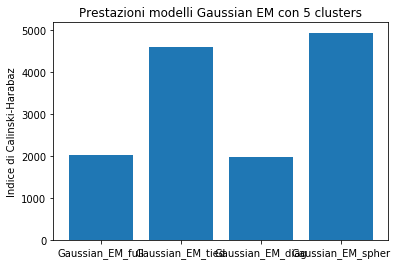

In [71]:
# Grafico di confronto delle prestazioni dei Gaussian_EM
plt.bar(Models_names[1:5], S_5_Clusters[1:5])
plt.title('Prestazioni modelli Gaussian EM con 5 clusters')
plt.ylabel('Indice di Calinski-Harabaz')
plt.show()

In [72]:
print("Il modello Gaussian EM migliore è il Gaussian EM Spherical.") 
print("Punteggio: %d" % Performance_df.iloc[4]['CH_index_5C'])

Il modello Gaussian EM migliore è il Gaussian EM Spherical.
Punteggio: 4937


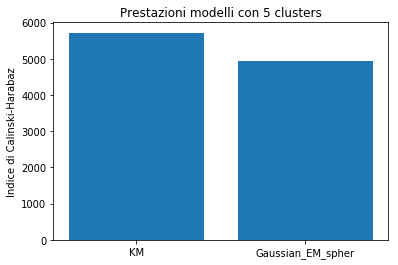

In [73]:
# Grafico di confronto del K-Means con il miglior Gaussian EM
plt.bar([Models_names[0],Models_names[4]], [S_5_Clusters[0],S_5_Clusters[4]])
plt.title('Prestazioni modelli con 5 clusters')
plt.ylabel('Indice di Calinski-Harabaz')
plt.show()

In [74]:
print("Il miglior modello con 5 clusters è il K-Means.") 
print("Punteggio: %d" % Performance_df.iloc[0]['CH_index_5C'])

Il miglior modello con 5 clusters è il K-Means.
Punteggio: 5718


##### 3 clusters:

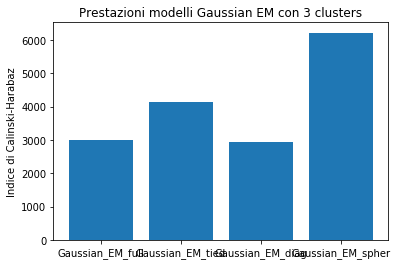

In [75]:
# Grafico di confronto delle prestazioni dei Gaussian_EM
plt.bar(Models_names[1:5], S_3_Clusters[1:5])
plt.title('Prestazioni modelli Gaussian EM con 3 clusters')
plt.ylabel('Indice di Calinski-Harabaz')
plt.show()

In [76]:
print("Anche in questo caso il modello migliore è il Gaussian EM Spherical.") 
print("Punteggio: %d" % Performance_df.iloc[4]['CH_index_3C'])

Anche in questo caso il modello migliore è il Gaussian EM Spherical.
Punteggio: 6213


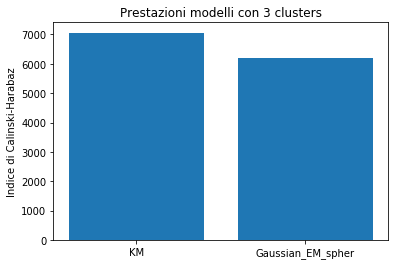

In [77]:
# Grafico di confronto del K-Means con il miglior Gaussian EM
plt.bar([Models_names[0],Models_names[4]], [S_3_Clusters[0],S_3_Clusters[4]])
plt.title('Prestazioni modelli con 3 clusters')
plt.ylabel('Indice di Calinski-Harabaz')
plt.show()

In [78]:
print("Anche in questo caso modello migliore è il K-Means.") 
print("Punteggio: %d" % Performance_df.iloc[0]['CH_index_3C'])
print("Anche se in questo caso la differenza è minima.")

Anche in questo caso modello migliore è il K-Means.
Punteggio: 7056
Anche se in questo caso la differenza è minima.


In [79]:
# Eliminazione delle strutture dati in eccesso
# Modelli
del KM_5
del Gaussian_EM_5_full
del Gaussian_EM_5_tied
del Gaussian_EM_5_diag
del Gaussian_EM_5_spher
del KM_3
del Gaussian_EM_3_full
del Gaussian_EM_3_tied
del Gaussian_EM_3_diag
del Gaussian_EM_3_spher
# Labels non in uso
del Gaussian_EM_5_full_labels
del Gaussian_EM_5_tied_labels
del Gaussian_EM_5_diag_labels
del Gaussian_EM_5_spher_labels
del Gaussian_EM_3_full_labels
del Gaussian_EM_3_tied_labels
del Gaussian_EM_3_diag_labels
del Gaussian_EM_3_spher_labels

## ANALISI DEI CLUSTERS

In questa sezione vengono analizzati i clusters trovati dai modelli migliori, trovati nella sezione precedente.  
Le semplici analisi effettuate sono:
+    Numero di recensioni per cluster;
+    Media delle valutazioni dei prodotti contenuti nei clusters;
+    Numero di recensioni per prodotto;
+    Numero di recensioni per recensore;
+    Numero di recensioni per anno;
+    Numero di features.
  
Le analisi sono mirate alla ricerca di pattern o trend all'interno dei clusters non limitandosi solo al testo delle recensioni, ma anche alle caratteristiche delle recensioni.  
Come prima cosa viene creato il dataset con le caratteristiche delle varie recensioni e l'aggiunta del cluster di appartenenza. Anche in questo caso viene fornito il dataset quindi i primi blocchi di codice riguardanti la creazione del dataset possono essere saltati.  
Successivamente il dataset creato viene preprocessato e ne vengono eseguite le analisi.

### Creazione del dataset

In [80]:
# Importazione del dataset dei metadati
t0 = time()

meta_df = getDF('./dataset/meta_Video_Games.json.gz')

print("Dataset importato in %0.3f secondi." % (time()-t0))

Dataset importato in 10.931 secondi.


In [81]:
# Indicizzo il dataset per codice prodotto (asin)
meta_df = meta_df.set_index('asin')

In [83]:
t0 = time()

base_path = './dataset/reviews_Video_Games_5.json.gz'
df = getDF(base_path)

print("Dati importanti in %0.3f secondi" % (time()-t0))

Dati importanti in 18.234 secondi


### Caricamento del dataset

In [42]:
# Caricamento del dataset per le analisi
review_df = pd.read_csv('./Strutture Dati/Analysis_dataset.csv')
# Esplorazione del dataset
review_df

Unnamed: 0  product  Unnamed: 0.1  \
0                0        0             0   
1                1        1             1   
2                2        2             2   
3                3        3             3   
4                4        4             4   
5                5        5             5   
6                6        6             6   
7                7        7             7   
8                8        8             8   
9                9        9             9   
10              10       10            10   
11              11       11            11   
12              12       12            12   
13              13       13            13   
14              14       14            14   
15              15       15            15   
16              16       16            16   
17              17       17            17   
18              18       18            18   
19              19       19            19   
20              20       20            20   
21              21       21            21   
22              22       22            22   
23              23       23            23   
24              24       24            24   
25              25       25            25   
26              26       26            26   
27              27       27            27   
28              28       28            28   
29              29       29            29   
...            ...      ...           ...   
231750      231750   231750        231750   
231751      231751   231751        231751   
231752      231752   231752        231752   
231753      231753   231753        231753   
231754      231754   231754        231754   
231755      231755   231755        231755   
231756      231756   231756        231756   
231757      231757   231757        231757   
231758      231758   231758        231758   
231759      231759   231759        231759   
231760      231760   231760        231760   
231761      231761   231761        231761   
231762      231762   231762        231762   
231763      231763   231763        231763   
231764      231764   231764        231764   
231765      231765   231765        231765   
231766      231766   231766        231766   
231767      231767   231767        231767   
231768      231768   231768        231768   
231769      231769   231769        231769   
231770      231770   231770        231770   
231771      231771   231771        231771   
231772      231772   231772        231772   
231773      231773   231773        231773   
231774      231774   231774        231774   
231775      231775   231775        231775   
231776      231776   231776        231776   
231777      231777   231777        231777   
231778      231778   231778        231778   
231779      231779   231779        231779   

                                                productId  \
0       Dirt 3 is a popular rally racing game for Play...   
1       Dirt 3 is a popular rally racing game for Play...   
2       Dirt 3 is a popular rally racing game for Play...   
3       Dirt 3 is a popular rally racing game for Play...   
4       Dirt 3 is a popular rally racing game for Play...   
5       Dirt 3 is a popular rally racing game for Play...   
6       Dirt 3 is a popular rally racing game for Play...   
7       Dirt 3 is a popular rally racing game for Play...   
8       Dirt 3 is a popular rally racing game for Play...   
9       Dirt 3 is a popular rally racing game for Play...   
10      Dirt 3 is a popular rally racing game for Play...   
11      Dirt 3 is a popular rally racing game for Play...   
12      Dirt 3 is a popular rally racing game for Play...   
13      Dirt 3 is a popular rally racing game for Play...   
14      Dirt 3 is a popular rally racing game for Play...   
15      Dirt 3 is a popular rally racing game for Play...   
16      Dirt 3 is a popular rally racing game for Play...   
17      Dirt 3 is a popular rally racing game for Play...   
18      Dirt 3 is a popular rally racing game for Play... 

In [43]:
# Rimuovo le colonne inutili
review_df = review_df.drop(['Unnamed: 0', 'product', 'Unnamed: 0.1'], axis=1)
# Tipo degli attributi
review_df.dtypes

productId        object
reviewerName     object
rating          float64
reviewTime       object
5C                int64
3C                int64
actual            int64
ani               int64
bad               int64
becaus            int64
befor             int64
best              int64
better            int64
bit               int64
buy               int64
ca                int64
charact           int64
come              int64
control           int64
did               int64
differ            int64
doe               int64
easi              int64
end               int64
enjoy             int64
everi             int64
fan               int64
feel              int64
fun               int64
game              int64
                 ...   
love              int64
make              int64
mani              int64
need              int64
new               int64
onli              int64
peopl             int64
play              int64
player            int64
point             int64
pretti          

### Pre processing del dataset

In [44]:
# Rinomino la colonna 0
review_df = review_df.rename(columns= {review_df.columns[0]: "product"})

# Conversione delle colonne:
# 5C e 3C in string (object)
# reviewTime in reviewYear di tipo int estraendo l'anno dalla stringa, valore a quattro cifre
# dopo ", "
review_df = review_df.astype({"5C": str, "3C": str})

# Estrazione dell'anno da reviewTime
reviews_year = []

for date in review_df['reviewTime']:
    reviews_year.append(date[date.find(",")+2:])
# Sostituzione della data di recensione con l'anno estratto
review_df['reviewTime'] = reviews_year
# Cambio di tipo da object a int
review_df = review_df.astype({'reviewTime': int})
# Rinomino la colonna reviewTime in reviewYear e visualizzo il dataset pre processato
review_df = review_df.rename(columns= {review_df.columns[3]: "reviewYear"})
review_df

product  \
0       Dirt 3 is a popular rally racing game for Play...   
1       Dirt 3 is a popular rally racing game for Play...   
2       Dirt 3 is a popular rally racing game for Play...   
3       Dirt 3 is a popular rally racing game for Play...   
4       Dirt 3 is a popular rally racing game for Play...   
5       Dirt 3 is a popular rally racing game for Play...   
6       Dirt 3 is a popular rally racing game for Play...   
7       Dirt 3 is a popular rally racing game for Play...   
8       Dirt 3 is a popular rally racing game for Play...   
9       Dirt 3 is a popular rally racing game for Play...   
10      Dirt 3 is a popular rally racing game for Play...   
11      Dirt 3 is a popular rally racing game for Play...   
12      Dirt 3 is a popular rally racing game for Play...   
13      Dirt 3 is a popular rally racing game for Play...   
14      Dirt 3 is a popular rally racing game for Play...   
15      Dirt 3 is a popular rally racing game for Play...   
16      Dirt 3 is a popular rally racing game for Play...   
17      Dirt 3 is a popular rally racing game for Play...   
18      Dirt 3 is a popular rally racing game for Play...   
19      Dirt 3 is a popular rally racing game for Play...   
20      Dirt 3 is a popular rally racing game for Play...   
21      Dirt 3 is a popular rally racing game for Play...   
22      Dirt 3 is a popular rally racing game for Play...   
23      Dirt 3 is a popular rally racing game for Play...   
24      Dirt 3 is a popular rally racing game for Play...   
25      These are the official Disney Microphones for ...   
26      These are the official Disney Microphones for ...   
27      These are the official Disney Microphones for ...   
28      These are the official Disney Microphones for ...   
29      These are the official Disney Microphones for ...   
...                                                   ...   
231750                                         B00KAI3KW2   
231751                                         B00KAI3KW2   
231752                                         B00KAI3KW2   
231753                                         B00KAI3KW2   
231754                                         B00KAI3KW2   
231755                                         B00KAI3KW2   
231756                                         B00KAI3KW2   
231757                                         B00KAI3KW2   
231758                                         B00KAI3KW2   
231759                                         B00KAI3KW2   
231760                                         B00KAI3KW2   
231761                                         B00KAI3KW2   
231762                                         B00KAI3KW2   
231763                                         B00KAI3KW2   
231764                                         B00KAI3KW2   
231765                                         B00KAI3KW2   
231766                                         B00KAI3KW2   
231767                                         B00KAI3KW2   
231768                                         B00KAI3KW2   
231769                                         B00KAI3KW2   
231770                                         B00KAI3KW2   
231771                                         B00KAI3KW2   
231772                                         B00KAI3KW2   
231773                                         B00KAI3KW2   
231774               Nintendo Wii U 32GB Mario Kart Bundl   
231775               Nintendo Wii U 32GB Mario Kart Bundl   
231776               Nintendo Wii U 32GB Mario Kart Bundl   
231777               Nintendo Wii U 32GB Mario Kart Bundl   
231778               Nintendo Wii U 32GB Mario Kart Bundl   
231779               Nintendo Wii U 32GB Mario Kart Bundl   

                               reviewerName  rating  reviewYear 5C 3C  actual  \
0                                       123     1.0        2012  1  1       0   
1        Alejandro Henao "Electronic Junky"     4.0        2013  3  0       0   
2                Amazon 

In [45]:
# Tipo degli attributi
review_df.dtypes

product          object
reviewerName     object
rating          float64
reviewYear        int64
5C               object
3C               object
actual            int64
ani               int64
bad               int64
becaus            int64
befor             int64
best              int64
better            int64
bit               int64
buy               int64
ca                int64
charact           int64
come              int64
control           int64
did               int64
differ            int64
doe               int64
easi              int64
end               int64
enjoy             int64
everi             int64
fan               int64
feel              int64
fun               int64
game              int64
                 ...   
love              int64
make              int64
mani              int64
need              int64
new               int64
onli              int64
peopl             int64
play              int64
player            int64
point             int64
pretti          

### Analisi clusters K-Means 5 clusters

#### Numero di recensioni per cluster

In [46]:
review_df['5C'].value_counts()

2    70541
1    70421
3    59675
0    17461
4    13682
Name: 5C, dtype: int64

A parte il primo cluster, il numero di recensioni è sempre decrescente da poco più di 70000 a 13682.

#### Media delle valutazioni dei prodotti contenuti nei clusters

In [47]:
review_df['rating'].groupby(review_df['5C']).mean()

5C
0    4.643606
1    4.099260
2    3.903631
3    4.094445
4    4.216270
Name: rating, dtype: float64

La media delle valutazioni scende da poco più di 4.6 nel primo cluster a circa 3.9 nel terzo cluster, per poi riaumentare fino a poco più di 4.2 nell'ultimo cluster. Quindi sicuramente il testo non spiega la valutazione dei prodotti (es. da più alta a più bassa in media).

#### Numero di recensioni per prodotto

In [48]:
# Raggruppo le recensioni per cluster e prodotto
grouped = review_df.groupby(['5C','product']).size()
# Ordino i valori in ordine decrescente
sorted_grouped = grouped.sort_values(ascending=False)
# Salvo la tabella in un file CSV temporaneo per convertire la variabile in DataFrame
sorted_grouped.to_csv('./tmp.csv', header=True, index_label= ['cluster','prodotto'])
sorted_grouped = pd.read_csv('./tmp.csv', index_col=['cluster'])

In [49]:
# Visualizzo i primi 5 prodotti con il più alto numero di recensioni per i clusters:
# Cluster 0
sorted_grouped.loc[0].head(5)

prodotto   0
cluster                                                       
0        The next chapter in the highly anticipated Eld...  53
0        With an Xbox LIVE Gold membership, take your X...  52
0        Twenty years after Nintendo's biggest franchis...  51
0                                               B0050SYX8W  50
0                          Officially licensed by Nintendo  47

In [50]:
# Cluster 1
sorted_grouped.loc[1].head(5)

prodotto    0
cluster                                                        
1        The next chapter in the highly anticipated Eld...  264
1        Battlefield 4is the genre-defining action bloc...  224
1        This action shooter takes place on a mysteriou...  210
1        Modern Warfare 2is a first-person tactical sho...  205
1        Call of Duty: Black Opsis a first-person shoot...  195

In [51]:
# Cluster 2
sorted_grouped.loc[2].head(5)

prodotto    0
cluster                                                        
2        The next chapter in the highly anticipated Eld...  324
2        Call of Duty: Black Opsis a first-person shoot...  273
2        Begin Game LogoEnd Game LogoBegin Descriptive ...  250
2        This template creates an A+ review that contai...  240
2        From BioWare, the makers ofMass Effect,Star Wa...  230

In [52]:
# Cluster 3
sorted_grouped.loc[3].head(5)

prodotto    0
cluster                                                        
3        With an Xbox LIVE Gold membership, take your X...  607
3                          Officially licensed by Nintendo  511
3        The Dualshock 3 wireless controller for the Pl...  406
3        Xbox LIVE is the online service for your Xbox 360  379
3                                               B003ZSP0WW  273

In [53]:
# Cluster 4
sorted_grouped.loc[4].head(5)

prodotto    0
cluster                                                        
4                                               B00BGA9WK2  503
4        As DVD playback made the PlayStation 2 more th...  230
4        The Dualshock 3 wireless controller for the Pl...  203
4        The fourth generation of hardware released for...  151
4        The fourth generation of hardware released for...  142

Guardando i primi cinque prodotti con il più alto numero di recensioni per ogni cluster si può notare che:
+    Il cluster 1 contiene maggiormente recensioni di video giochi, in particolare di video giochi di tipo FPS, ovvero sparatutto in prima persona;
+    Il cluster 3 contiene maggiormente recensioni di componenti per console;
+    Il cluster 4 contiene maggiormente recensioni relative a componenti e console Play Station della Sony.

#### Numero di recensioni per recensore

In [54]:
grouped = review_df.groupby(['5C','reviewerName']).size()
# Ordino i valori in ordine decrescente
sorted_grouped = grouped.sort_values(ascending=False)
# Salvo la tabella in un file CSV temporaneo per convertire la variabile in DataFrame
sorted_grouped.to_csv('./tmp.csv', header=True, index_label= ['cluster','recensore'])
sorted_grouped = pd.read_csv('./tmp.csv', index_col=['cluster'])

In [55]:
# Visualizzo i primi 5 prodotti con il più alto numero di recensioni per i clusters:
# Cluster 0
sorted_grouped.loc[0].head(5)

recensore    0
cluster                      
0        Amazon Customer  170
0                  Chris   39
0                Michael   30
0                   Mike   27
0                 Daniel   26

In [56]:
# Cluster 1
sorted_grouped.loc[1].head(5)

recensore    0
cluster                                                       
1                                         Amazon Customer  531
1                                    N. Durham "Big Evil"  265
1                         Michael Kerner "Michael Kerner"  147
1        Lisa Shea "be the change you wish to see in t...  141
1                                                   Chris  134

In [57]:
# Cluster 2
sorted_grouped.loc[2].head(5)

recensore    0
cluster                                                       
2        Lisa Shea "be the change you wish to see in t...  532
2                                         Amazon Customer  510
2                           Richard Baker "BinaryMessiah"  408
2                                               S. Rhodes  352
2                                    N. Durham "Big Evil"  220

In [58]:
# Cluster 3
sorted_grouped.loc[3].head(5)

recensore    0
cluster                                        
3                          Amazon Customer  516
3          Michael Kerner "Michael Kerner"  135
3        Video Game History "Gamer 4 life"  103
3                               Deimos "."  100
3                                     John   92

In [59]:
# Cluster 4
sorted_grouped.loc[4].head(5)

recensore    0
cluster                                             
4                               Amazon Customer  135
4                          N. Durham "Big Evil"   99
4        Rich(Anime&Games Will Always Prevail!)   41
4                             A. Dent "Aragorn"   39
4                                     Stephanie   34

Guardando i primi cinque clienti con il più alto numero di recensioni effettuate nei vari clsuters si vede come la maggior parte delle recensioni siano fatte da Amazon Customer, ovvero clienti anonimi; tranne nel cluster 2 dove ne ha fatte di più Lisa Shea.

#### Numero di recensioni per anno

In [60]:
grouped = review_df.groupby(['5C','reviewYear']).size()
# Salvo la tabella in un file CSV temporaneo per convertire la variabile in DataFrame
grouped.to_csv('./tmp.csv', header= True, index_label= ['cluster','anno'])
grouped = pd.read_csv('./tmp.csv', index_col=['cluster'])

In [61]:
# Visualizzo i primi 5 prodotti con il più alto numero di recensioni per i clusters:
# Cluster 0
grouped.loc[0]

anno     0
cluster            
0        1999     8
0        2000    68
0        2001   154
0        2002   257
0        2003   216
0        2004   248
0        2005   280
0        2006   249
0        2007   449
0        2008   655
0        2009   787
0        2010  1102
0        2011  1488
0        2012  2452
0        2013  6169
0        2014  2879

In [62]:
# Cluster 1
grouped.loc[1]

anno      0
cluster             
1        1999     23
1        2000    668
1        2001   1941
1        2002   2767
1        2003   2601
1        2004   2610
1        2005   2655
1        2006   2309
1        2007   3211
1        2008   4197
1        2009   4882
1        2010   5629
1        2011   6999
1        2012   8428
1        2013  14432
1        2014   7069

In [63]:
# Cluster 2
grouped.loc[2]

anno     0
cluster            
2        1999    12
2        2000   694
2        2001  1823
2        2002  2789
2        2003  2963
2        2004  3157
2        2005  3502
2        2006  3121
2        2007  3279
2        2008  4760
2        2009  5562
2        2010  6873
2        2011  8401
2        2012  8797
2        2013  9990
2        2014  4818

In [64]:
# Cluster 3
grouped.loc[3]

anno      0
cluster             
3        1999     20
3        2000    252
3        2001    750
3        2002   1143
3        2003   1006
3        2004    967
3        2005   1097
3        2006    968
3        2007   1973
3        2008   2684
3        2009   3081
3        2010   3849
3        2011   5772
3        2012   8183
3        2013  18256
3        2014   9674

In [65]:
# Cluster 4
grouped.loc[4]

anno     0
cluster            
4        2000    54
4        2001   267
4        2002   354
4        2003   265
4        2004   292
4        2005   290
4        2006   262
4        2007   703
4        2008   831
4        2009   958
4        2010  1018
4        2011  1056
4        2012  1504
4        2013  3613
4        2014  2215

Dall'analisi si vede come il numero di recensioni effettuare aumenti fino al 2013 per poi riscendere nel 2014.

#### Numero di features (key words) nei vari clusters

In [ ]:
# Caratteristiche per una buona word cloud
# Creo il layout
plt.figure(figsize=[7,5], dpi=400)
# Definisco le caratteristiche della word cloud
wordcloud = WordCloud(width=2800,
                      height=2000
                      max_font_size=40, 
                      collocations=False, 
                      colormap = 'autumn', 
                      background_color = '#1F1F1F').fit_words(dict_list[0])
# Mostro la word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.set_title('Cluster 0', fontsize = 16)
plt.axis("off")

In [66]:
# Raggruppo le recensioni per cluster
grouped = review_df.set_index('5C')
# Carico la lista di termini
terms = joblib.load('./Strutture Dati/Features.pkl')
clusters = ['0','1','2','3','4']
# Creo le liste di conteggio dei termini nei vari clusters
term_counts = np.zeros((len(clusters),len(terms)))

for c in range(0,len(clusters)):
    for t in range(0,len(terms)):
        term = terms[t]
        cluster = clusters[c]
        term_cluster_sum = grouped.at[cluster, term].sum()
        term_counts[c][t] = term_cluster_sum

# Creo la lista che conterrà le somme di tutti i termini nei clusters
term_counts_clusters = []

for c in range(0,len(clusters)):
    term_counts_clusters.append(sum(term_counts[c][:]))
    
# Determino i pesi per ogni termine in ogni cluster
for t in range(0,len(terms)):
    for c in range(0,len(clusters)):
        term_counts[c][t] = term_counts[c][t]/term_counts_clusters[c]

# Creo i dizionari per le wordclouds
zero_df = pd.DataFrame({'term' : terms, 'weight' : term_counts[0][:]})
zero_df = zero_df.sort_values(['weight', 'term'], ascending=[0, 1])
zero_dict = zero_df.set_index('term')['weight'].to_dict()
one_df = pd.DataFrame({'term' : terms, 'weight' : term_counts[1][:]})
one_df = one_df.sort_values(['weight', 'term'], ascending=[0, 1])
one_dict = one_df.set_index('term')['weight'].to_dict()
two_df = pd.DataFrame({'term' : terms, 'weight' : term_counts[2][:]})
two_df = two_df.sort_values(['weight', 'term'], ascending=[0, 1])
two_dict = two_df.set_index('term')['weight'].to_dict()
three_df = pd.DataFrame({'term' : terms, 'weight' : term_counts[3][:]})
three_df = three_df.sort_values(['weight', 'term'], ascending=[0, 1])
three_dict = three_df.set_index('term')['weight'].to_dict()
four_df = pd.DataFrame({'term' : terms, 'weight' : term_counts[4][:]})
four_df = four_df.sort_values(['weight', 'term'], ascending=[0, 1])
four_dict = four_df.set_index('term')['weight'].to_dict()
# Lista dei dizionari
dict_list = [zero_dict, one_dict, two_dict, three_dict, four_dict]

(-0.5, 2799.5, 1999.5, -0.5)

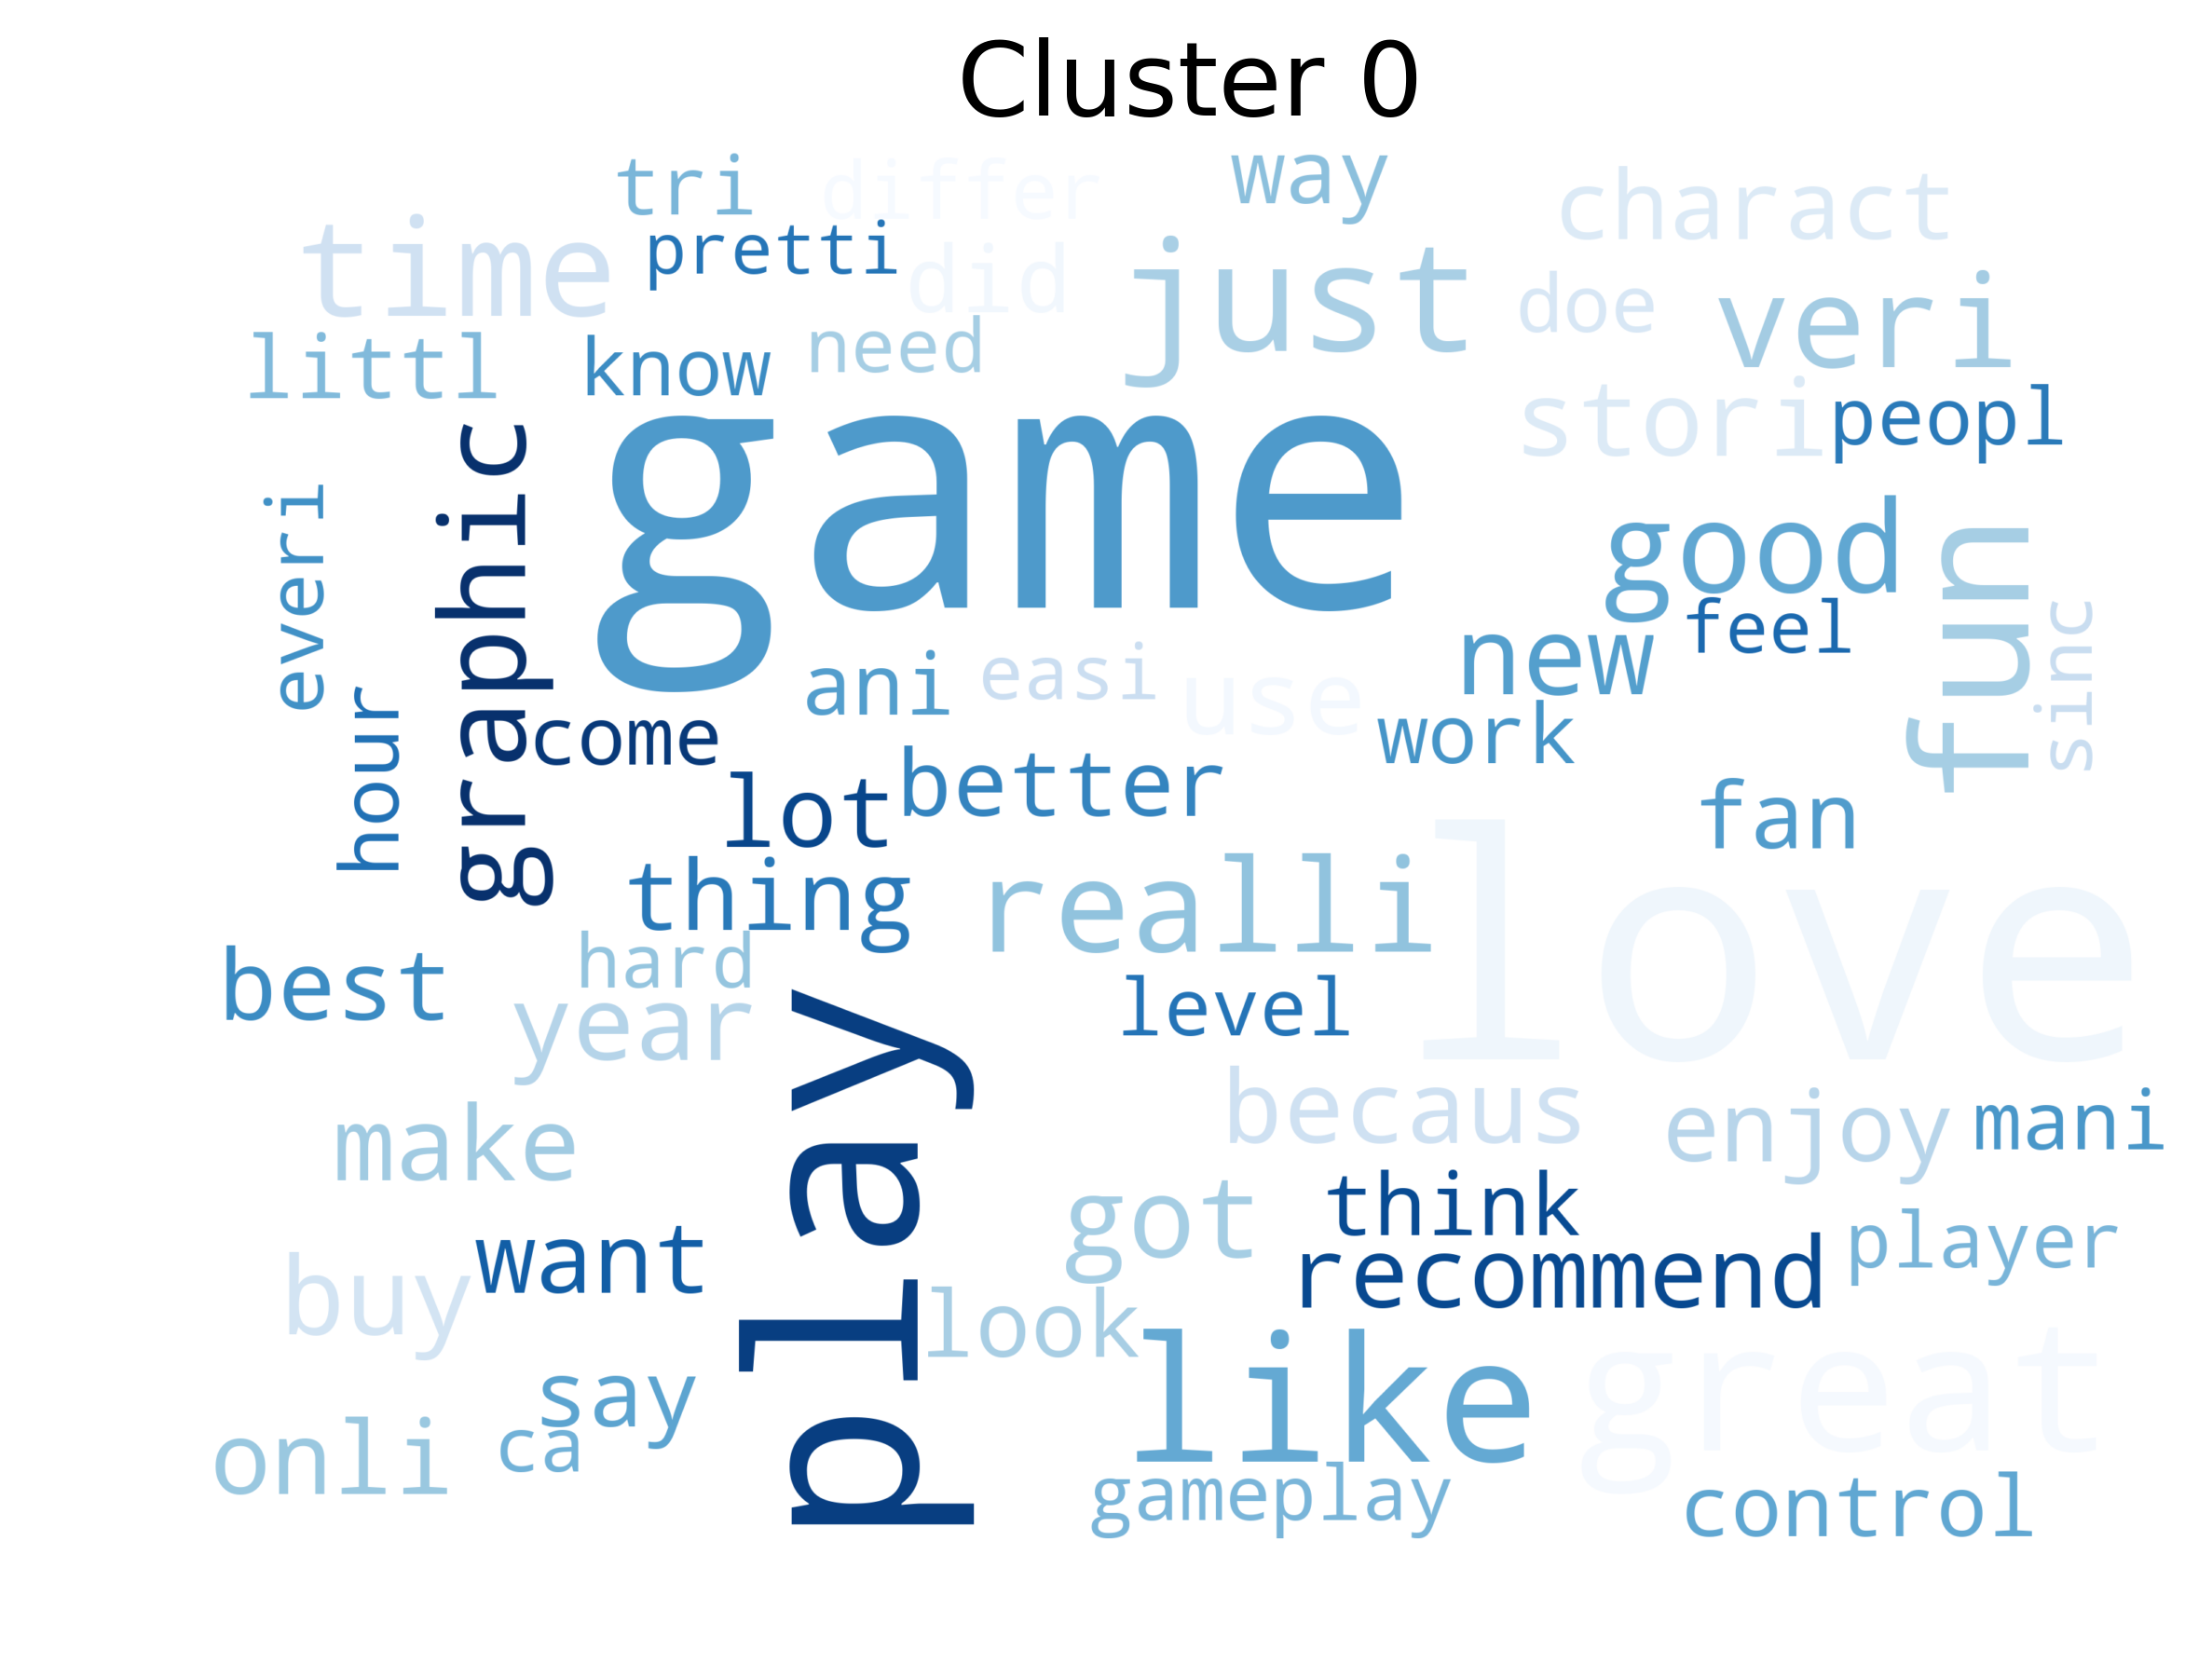

In [67]:
# Creo e visualizzo le wordclouds

# Cluster 0

# Creo il layout
fig, ax = plt.subplots(figsize=[7,5], dpi=400)
# Definisco le caratteristiche della word cloud
wordcloud = WordCloud(width=2800,
                      height=2000,
                      max_font_size=500,
                      min_font_size=100,
                      collocations=False, 
                      colormap = 'Blues', 
                      background_color = 'white').fit_words(dict_list[0])
# Mostro la word cloud
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_title('Cluster 0', fontsize = 20)
ax.axis("off")

In [68]:
# 10 parole più presenti nel cluster
{k: wordcloud.words_[k] for k in list(wordcloud.words_)[:10]}

{'game': 1.0,
 'love': 0.7960284227889862,
 'play': 0.38754599670092627,
 'great': 0.2081588630884406,
 'like': 0.19550183986803707,
 'fun': 0.16273315569090216,
 'just': 0.14747493972846085,
 'time': 0.1117561223195026,
 'realli': 0.10385737850526583,
 'veri': 0.10144651693947469}

(-0.5, 2799.5, 1999.5, -0.5)

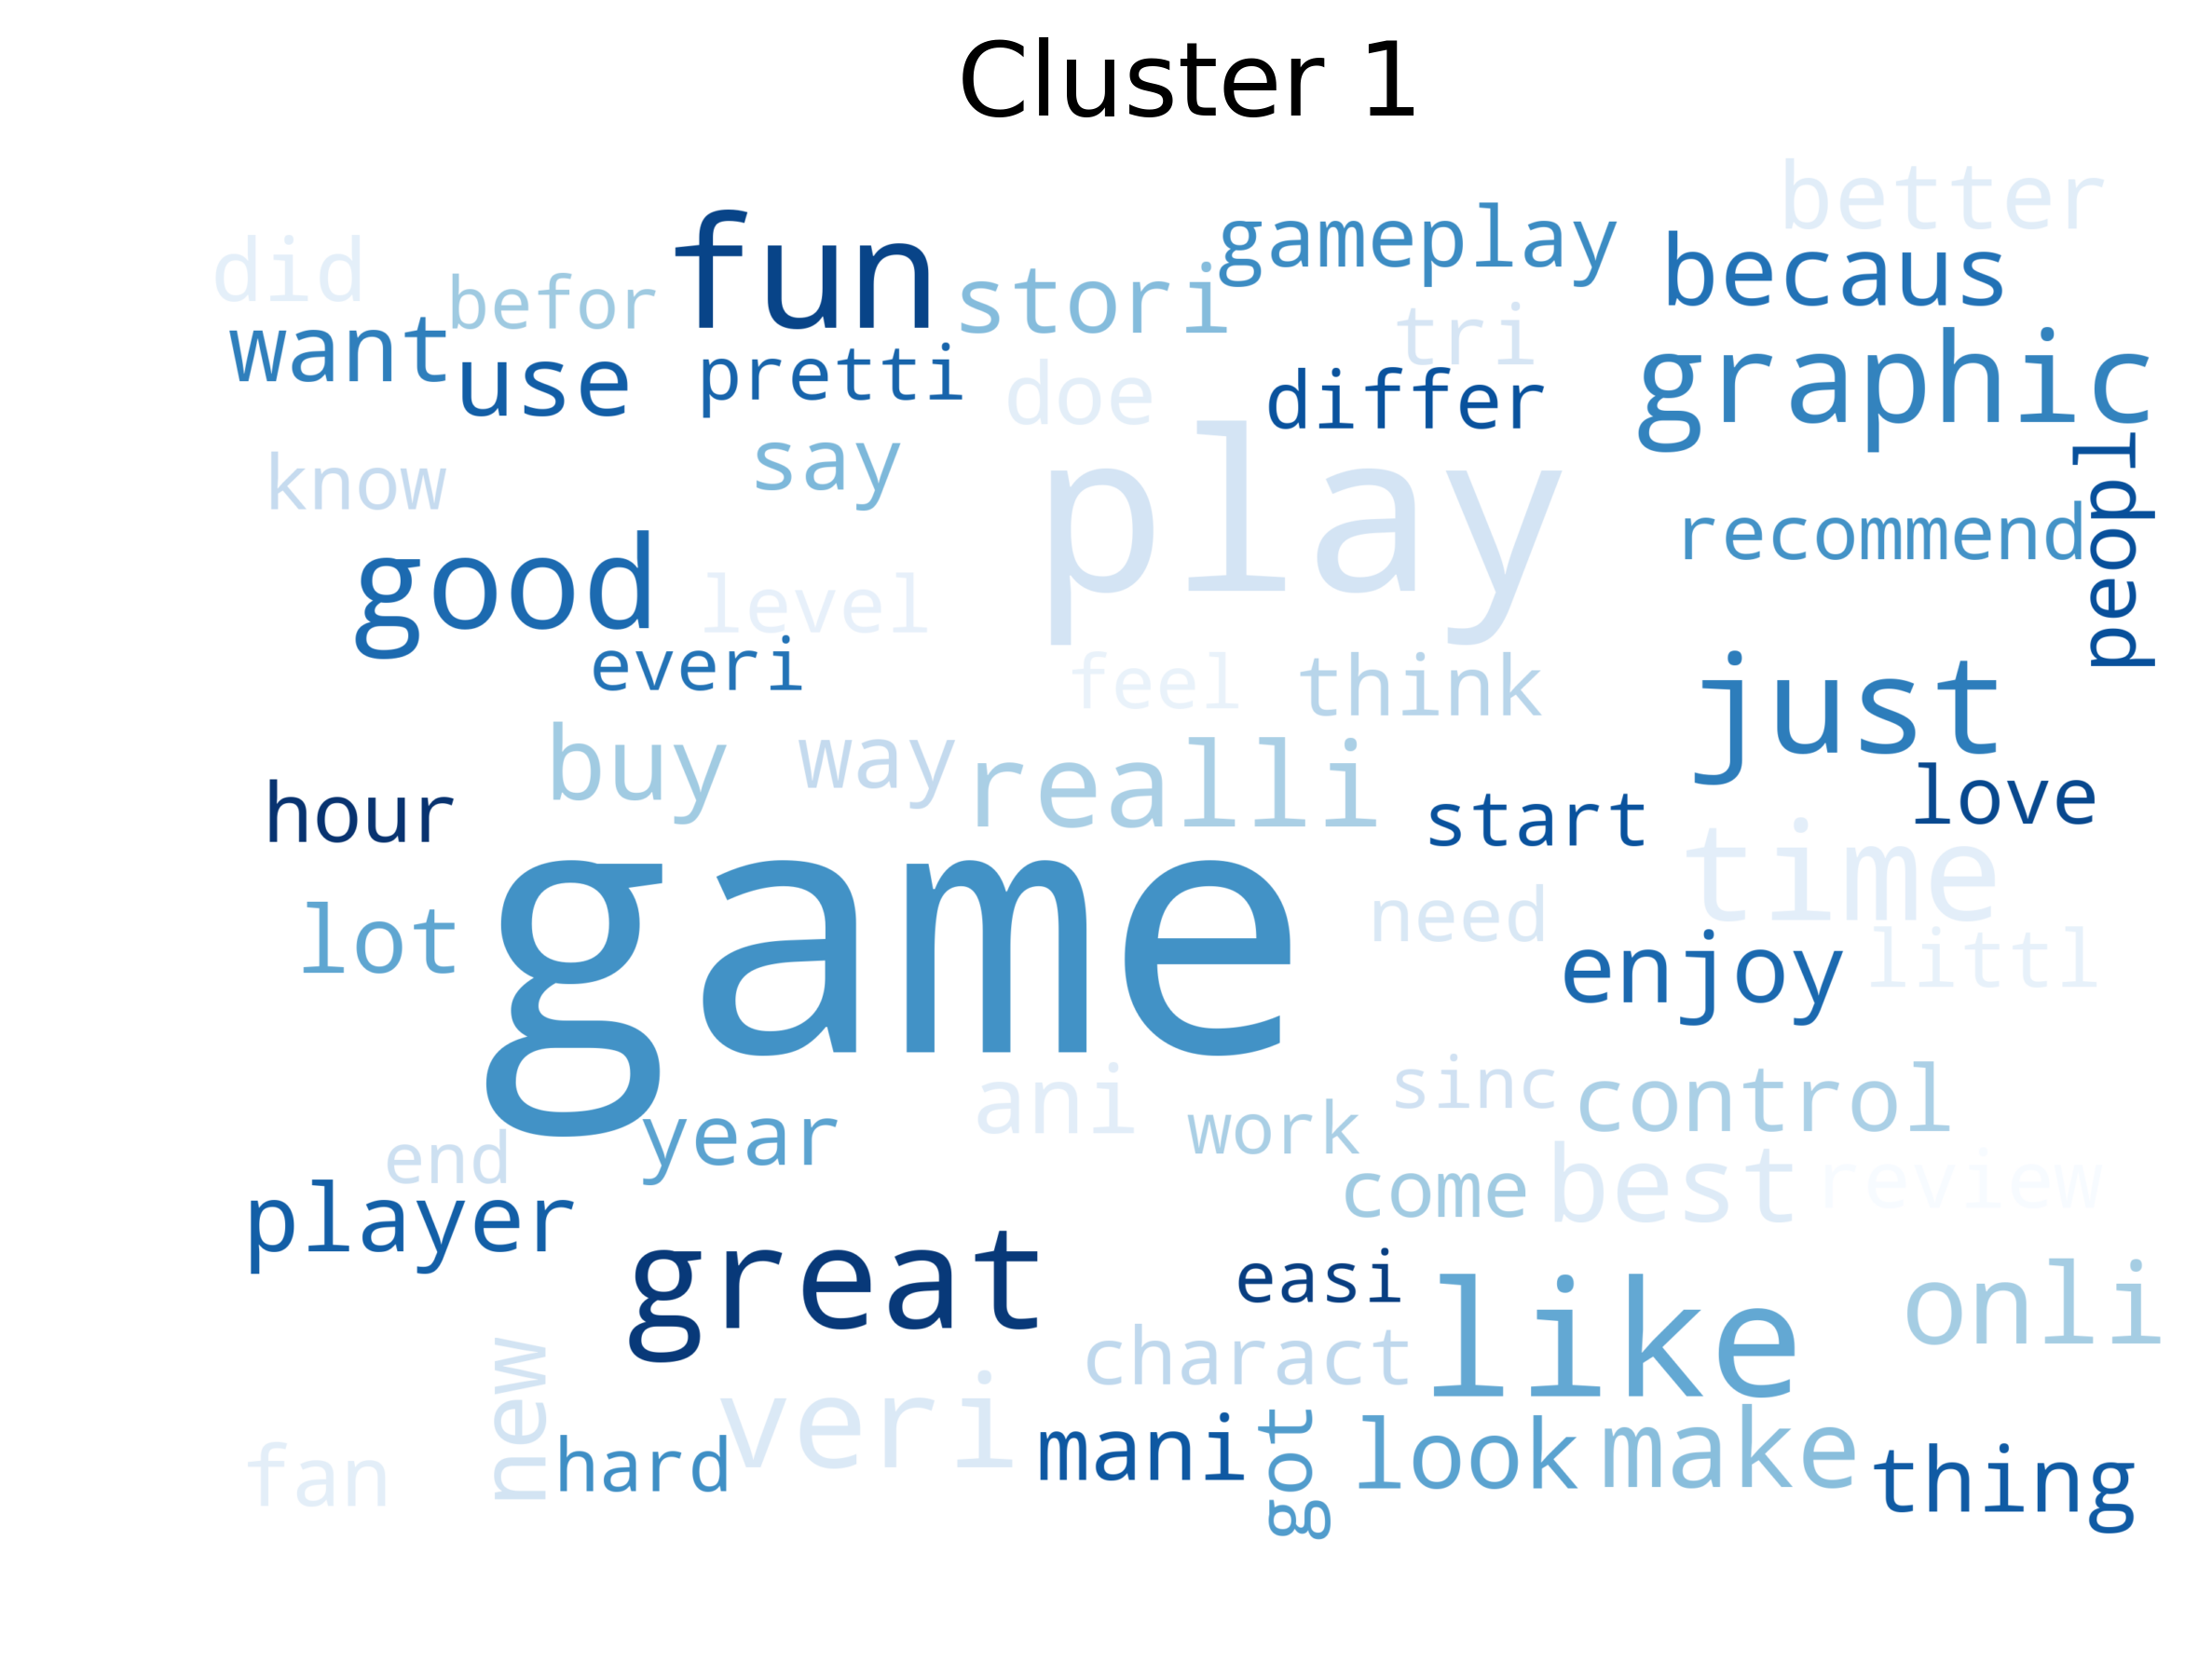

In [69]:
# Cluster 1

# Creo il layout
fig, ax = plt.subplots(figsize=[7,5], dpi=400)
# Definisco le caratteristiche della word cloud
wordcloud = WordCloud(width=2800,
                      height=2000,
                      max_font_size=500,
                      min_font_size=100,
                      collocations=False, 
                      colormap = 'Blues', 
                      background_color = 'white').fit_words(dict_list[1])
# Mostro la word cloud
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_title('Cluster 1', fontsize = 20)
ax.axis("off")

In [70]:
# 10 parole più presenti nel cluster
{k: wordcloud.words_[k] for k in list(wordcloud.words_)[:10]}

{'game': 1.0,
 'play': 0.2765536687122826,
 'like': 0.12124676252567651,
 'fun': 0.11020043634136695,
 'great': 0.09541076053534747,
 'time': 0.08538511591114967,
 'just': 0.08492070580129882,
 'good': 0.07717883616785108,
 'veri': 0.07647201418747368,
 'graphic': 0.07279500886717104}

(-0.5, 2799.5, 1999.5, -0.5)

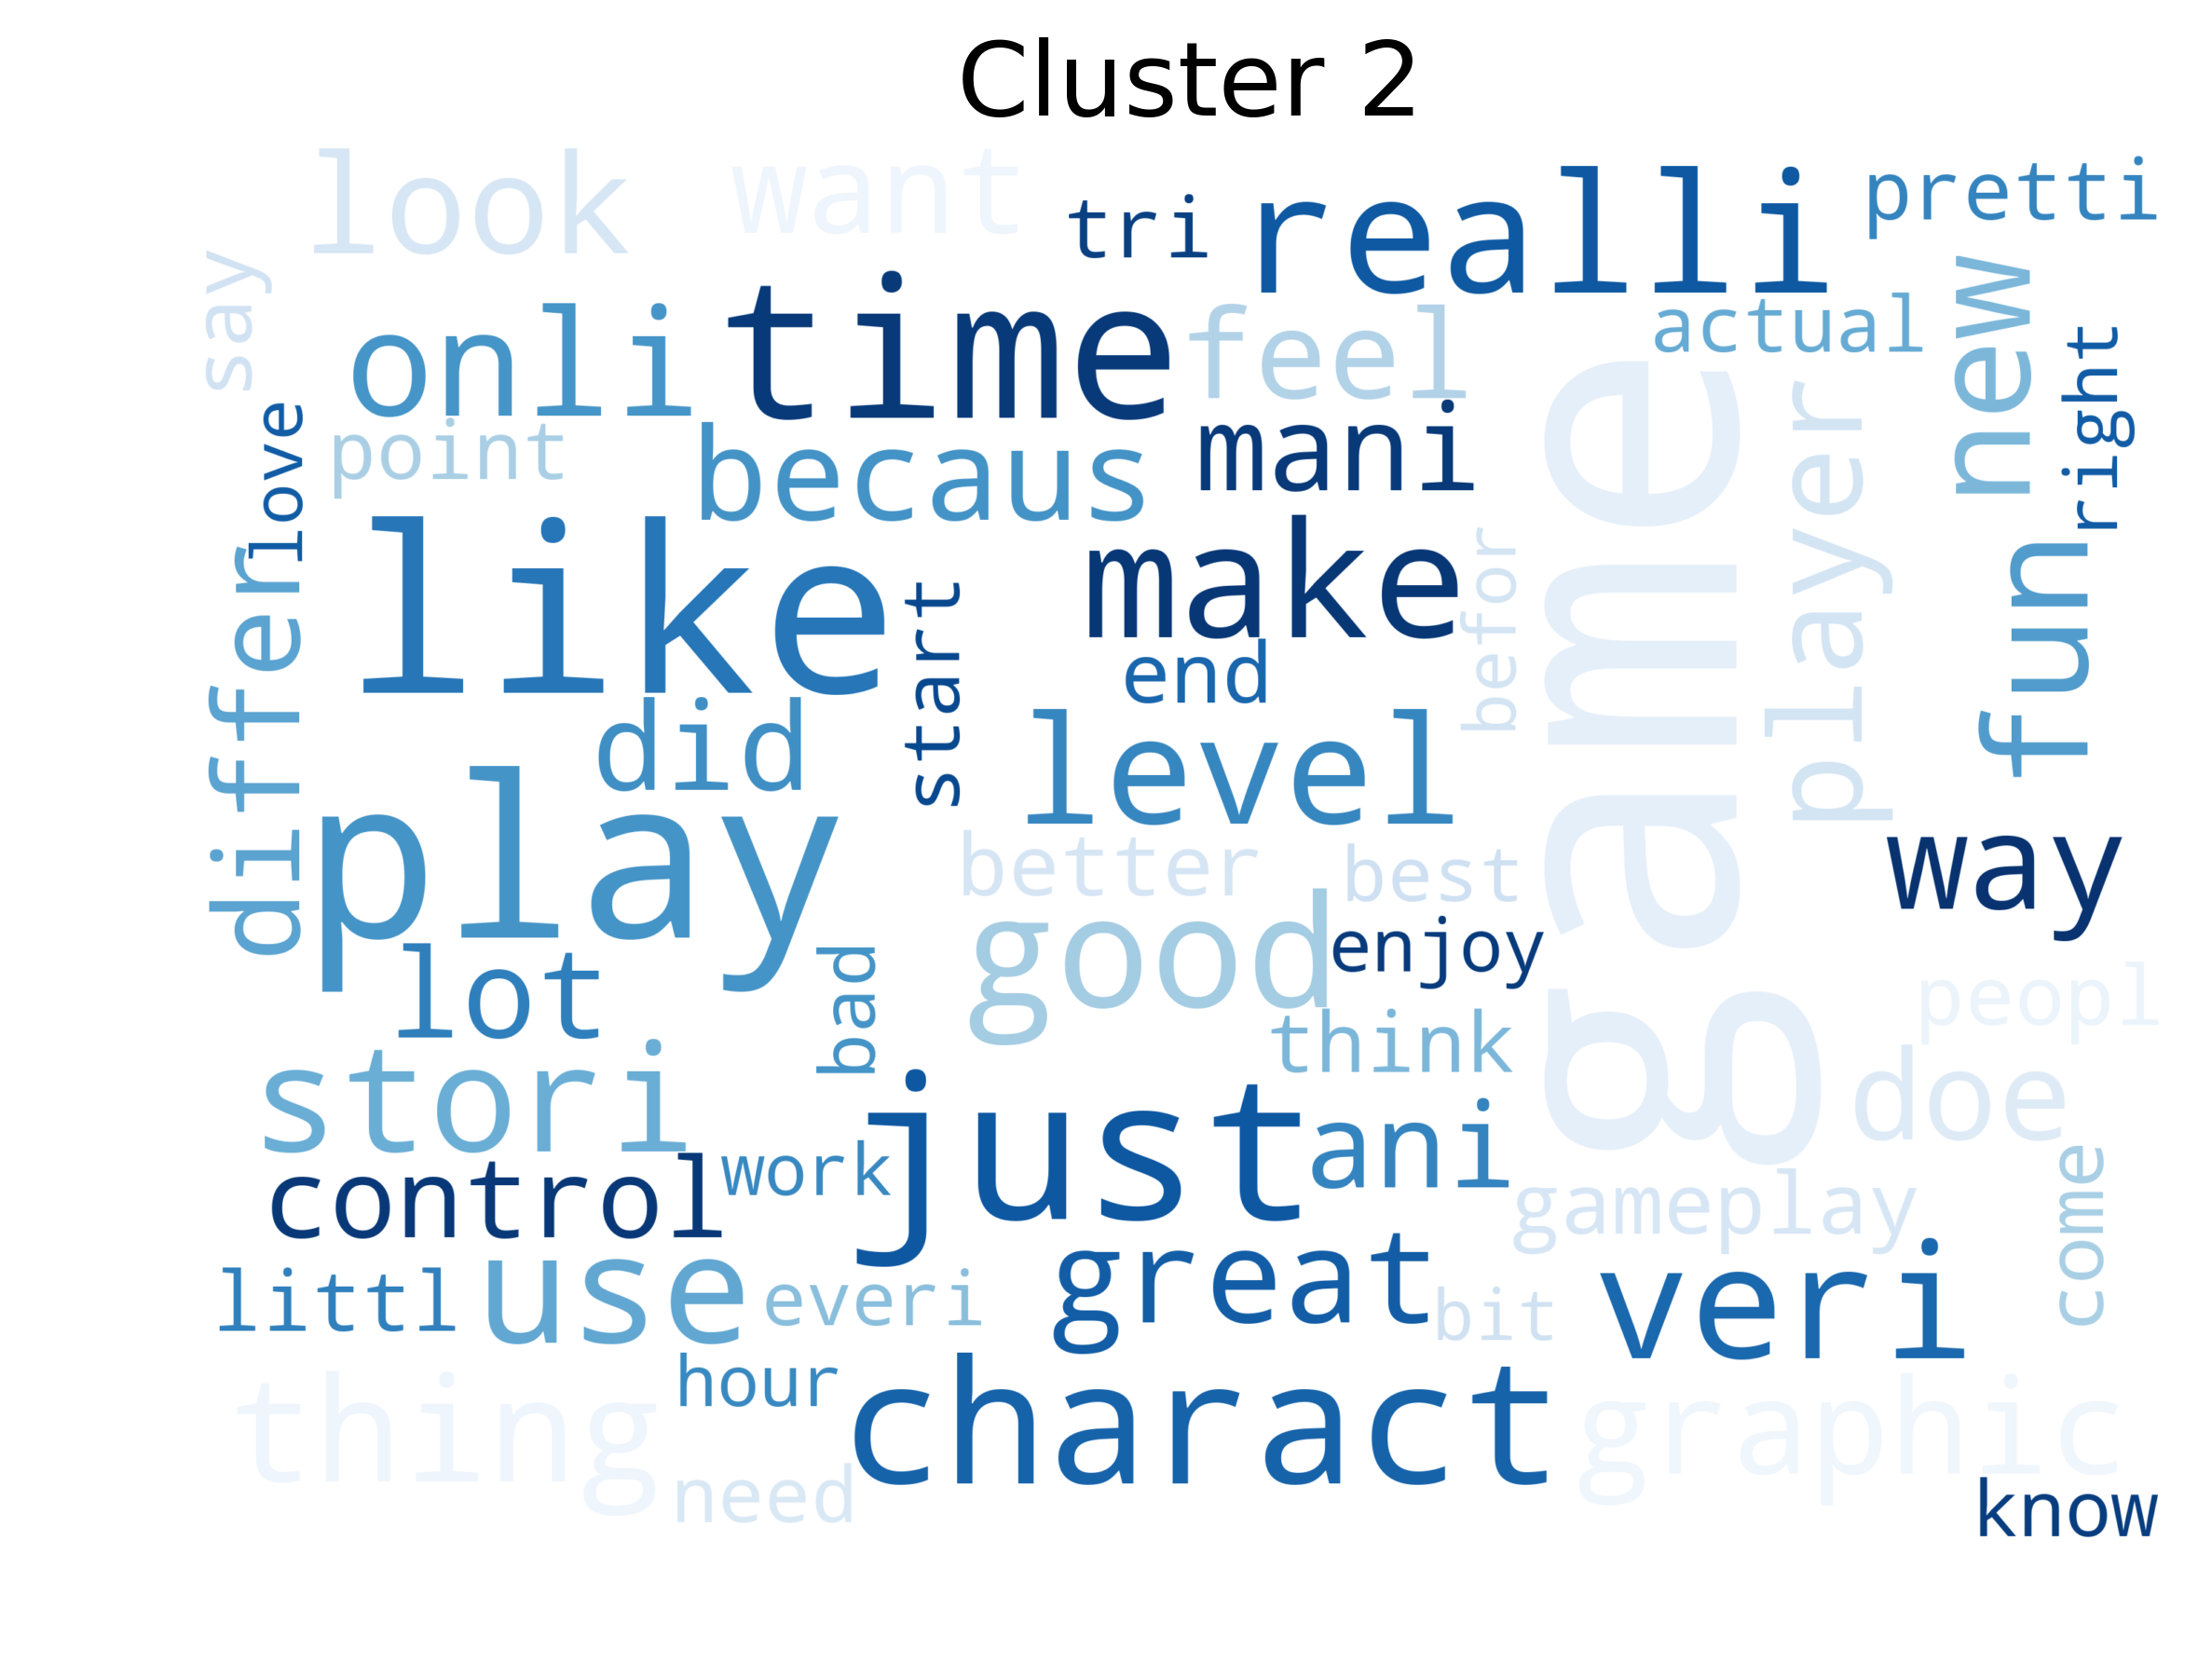

In [71]:
# Cluster 2

# Creo il layout
fig, ax = plt.subplots(figsize=[7,5], dpi=400)
# Definisco le caratteristiche della word cloud
wordcloud = WordCloud(width=2800,
                      height=2000,
                      max_font_size=500,
                      min_font_size=100,
                      collocations=False, 
                      colormap = 'Blues', 
                      background_color = 'white').fit_words(dict_list[2])
# Mostro la word cloud
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_title('Cluster 2', fontsize = 20)
ax.axis("off")

In [72]:
# 10 parole più presenti nel cluster
{k: wordcloud.words_[k] for k in list(wordcloud.words_)[:10]}

{'game': 1.0,
 'like': 0.31808485146026566,
 'play': 0.2998868101703302,
 'just': 0.22665045772720277,
 'time': 0.21771800731350466,
 'charact': 0.16878532311702582,
 'realli': 0.15830406178099618,
 'make': 0.14784812691287888,
 'veri': 0.14456542703347186,
 'good': 0.14116973214337897}

(-0.5, 2799.5, 1999.5, -0.5)

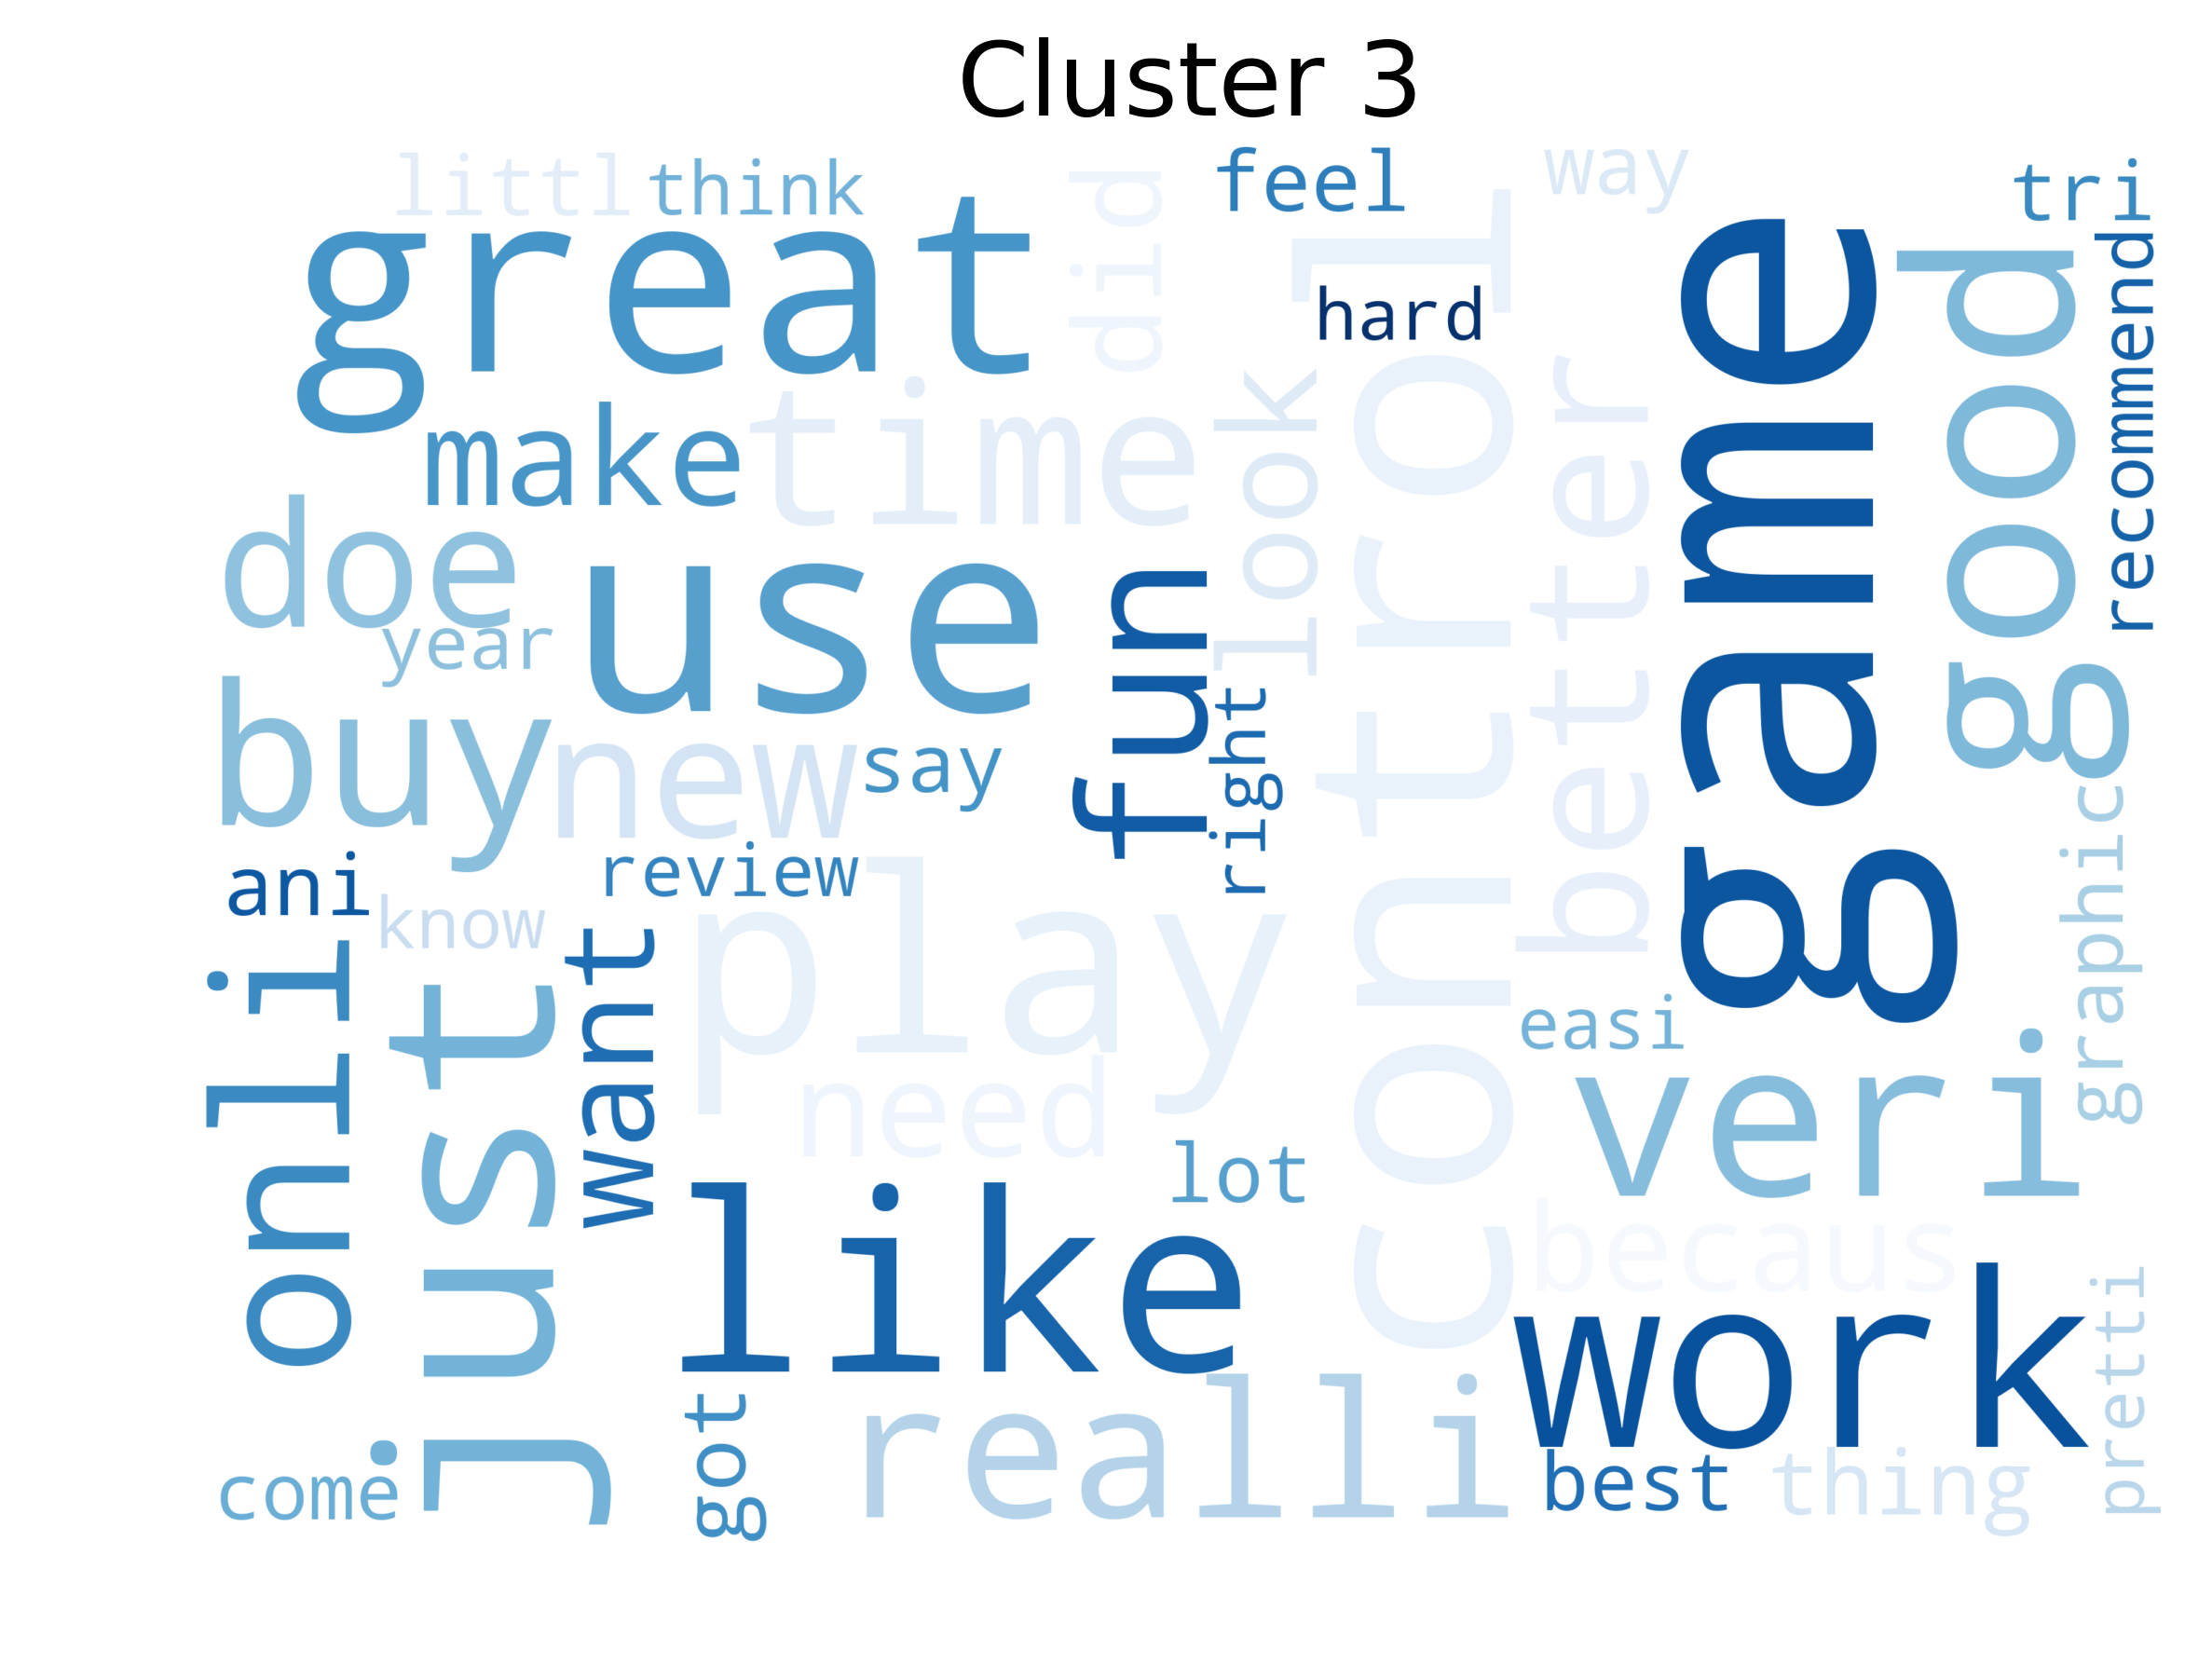

In [73]:
# Cluster 3

# Creo il layout
fig, ax = plt.subplots(figsize=[7,5], dpi=400)
# Definisco le caratteristiche della word cloud
wordcloud = WordCloud(width=2800,
                      height=2000,
                      max_font_size=500,
                      min_font_size=100,
                      collocations=False, 
                      colormap = 'Blues', 
                      background_color = 'white').fit_words(dict_list[3])
# Mostro la word cloud
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_title('Cluster 3', fontsize = 20)
ax.axis("off")

In [74]:
# 10 parole più presenti nel cluster
{k: wordcloud.words_[k] for k in list(wordcloud.words_)[:10]}

{'game': 1.0,
 'control': 0.6378810165890332,
 'use': 0.5604927678352537,
 'play': 0.5090708506987006,
 'great': 0.5067622783361935,
 'like': 0.47560676636430493,
 'work': 0.450927514913786,
 'just': 0.4465146686279317,
 'good': 0.4126215575713001,
 'veri': 0.3727220724033668}

(-0.5, 2799.5, 1999.5, -0.5)

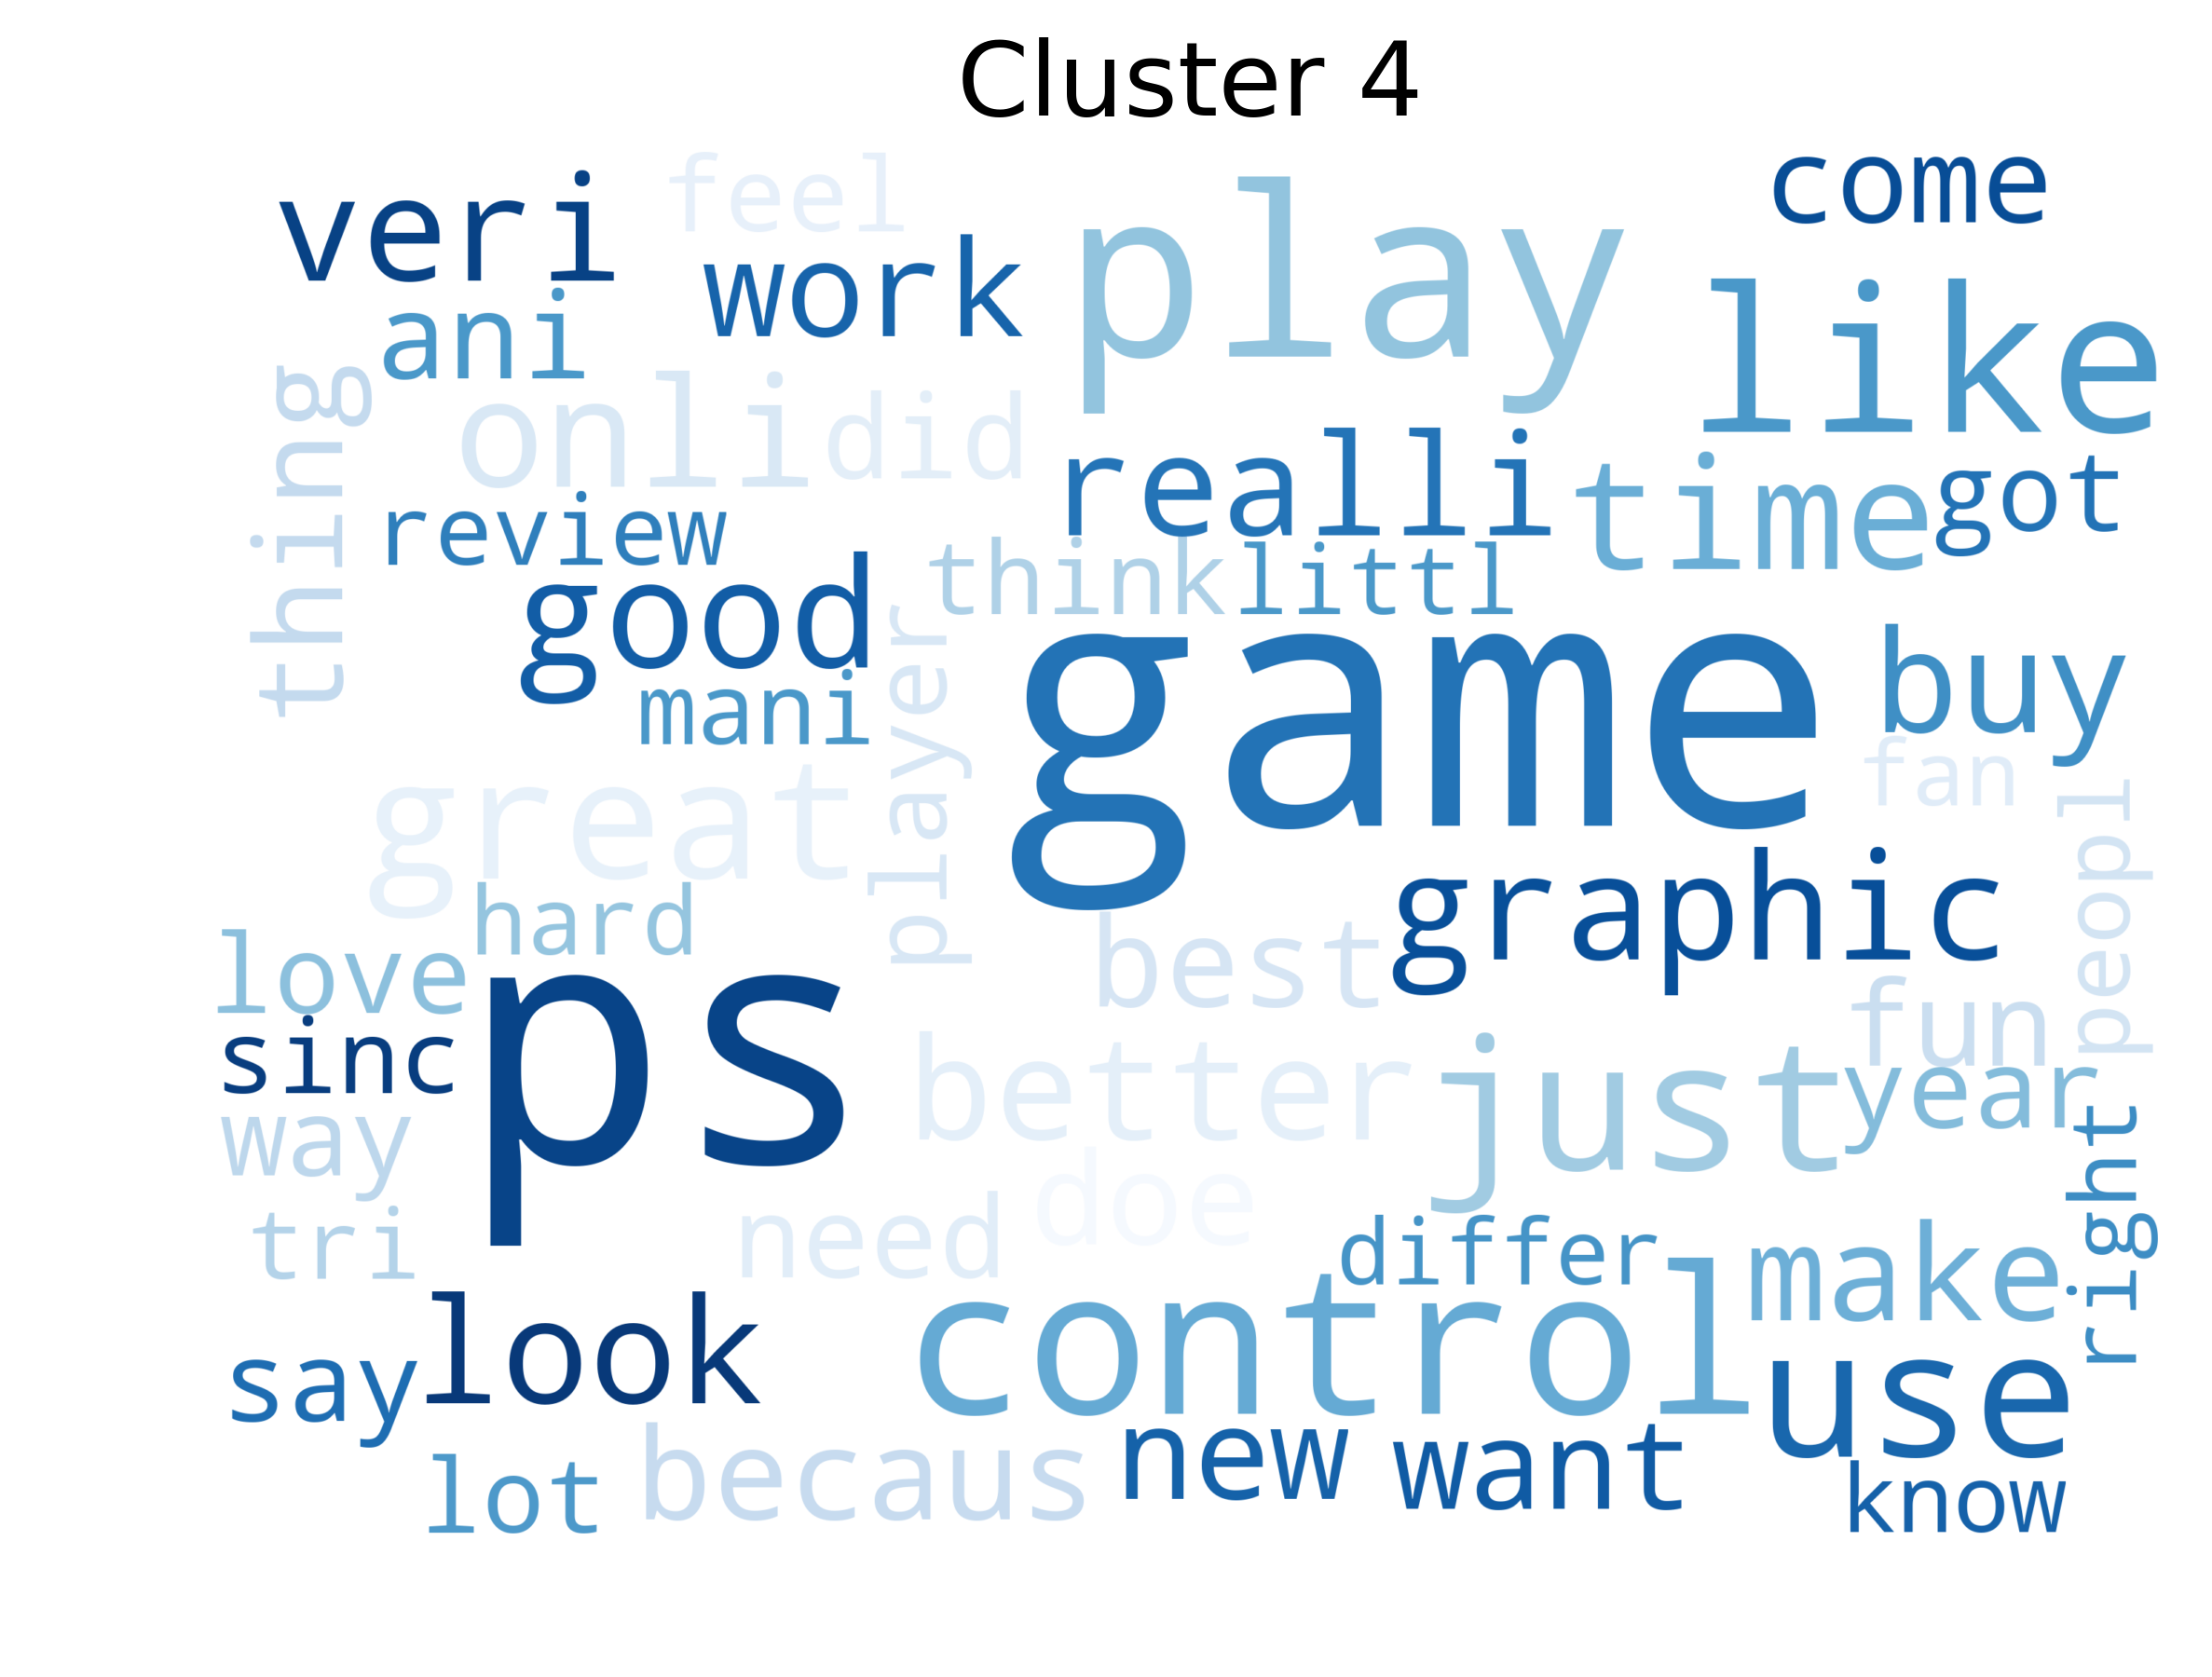

In [75]:
# Cluster 4

# Creo il layout
fig, ax = plt.subplots(figsize=[7,5], dpi=400)
# Definisco le caratteristiche della word cloud
wordcloud = WordCloud(width=2800,
                      height=2000,
                      max_font_size=500,
                      min_font_size=100,
                      collocations=False, 
                      colormap = 'Blues', 
                      background_color = 'white').fit_words(dict_list[4])
# Mostro la word cloud
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_title('Cluster 4', fontsize = 20)
ax.axis("off")

In [76]:
# 10 parole più presenti nel cluster
{k: wordcloud.words_[k] for k in list(wordcloud.words_)[:10]}

{'game': 1.0,
 'ps': 0.9601073165839226,
 'play': 0.3605636628052756,
 'control': 0.26450529060729155,
 'like': 0.2553532922120255,
 'just': 0.20422747103956673,
 'use': 0.19585276565869317,
 'great': 0.17421393109673539,
 'time': 0.14670778797452488,
 'onli': 0.14244521337946944}

Dall'analisi si vede che la parola più utilizzata in tutti i clusters è __game__. Un'altra parola molto utilizzata, sempre nei primi tre posti dei primi clusters è __play__.  
Guardando le prime quattro parole per ogni cluster si vede come nei primi clusters si manifesti l'amore per il prodotto con parole come: __game, play, like, love__.  
Mentre negli ultimi due clusters si manifesti una voglia di sicurezza con parole come: __control, use, ps__.

### Analisi clusters K-Means 3 clusters

#### Numero di recensioni per cluster

In [77]:
review_df['3C'].value_counts()

1    126703
0     72473
2     32604
Name: 3C, dtype: int64

Dall'analisi si vede che il secondo cluster ha il numero di recensioni più alto, poco più di 125000, mentre il terzo cluster ha il numero di recensioni più basso, poco più di 30000.

#### Media delle valutazioni dei prodotti contenuti nei clusters

In [78]:
review_df['rating'].groupby(review_df['3C']).mean()

3C
0    4.032398
1    3.978130
2    4.627162
Name: rating, dtype: float64

Dall'analisi si vede che le recensioni nel secondo cluster hanno la valutazione media più bassa, quasi 3.98, mentre le recensioni nel terzo cluster hanno la valutazione media più alta, quasi 4.63.

#### Numero di recensioni per prodotto

In [79]:
# Raggruppo le recensioni per cluster e prodotto
grouped = review_df.groupby(['3C','product']).size()
# Ordino i valori in ordine decrescente
sorted_grouped = grouped.sort_values(ascending=False)
# Salvo la tabella in un file CSV temporaneo per convertire la variabile in DataFrame
sorted_grouped.to_csv('./tmp.csv', header= True, index_label= ['cluster','prodotto'])
sorted_grouped = pd.read_csv('./tmp.csv', index_col=['cluster'])

In [80]:
# Visualizzo i primi 5 prodotti con il più alto numero di recensioni per i clusters:
# Cluster 0
sorted_grouped.loc[0].head(5)

prodotto    0
cluster                                                        
0                                               B00BGA9WK2  652
0        The Dualshock 3 wireless controller for the Pl...  605
0        With an Xbox LIVE Gold membership, take your X...  579
0                          Officially licensed by Nintendo  486
0        Xbox LIVE is the online service for your Xbox 360  371

In [81]:
# Cluster 1
sorted_grouped.loc[1].head(5)

prodotto    0
cluster                                                        
1        The next chapter in the highly anticipated Eld...  552
1        Call of Duty: Black Opsis a first-person shoot...  410
1        Begin Game LogoEnd Game LogoBegin Descriptive ...  402
1        This template creates an A+ review that contai...  382
1                                               B007CM0K86  360

In [82]:
# Cluster 2
sorted_grouped.loc[2].head(5)

prodotto    0
cluster                                                        
2        With an Xbox LIVE Gold membership, take your X...  133
2                                               B0050SYX8W  107
2        The next chapter in the highly anticipated Eld...  102
2        Modern Warfare 2is a first-person tactical sho...   94
2                          Officially licensed by Nintendo   93

Dall'analisi si nota che:
+    Il primo cluster contiene recensioni di prodotti maggiormente di tipo Console e componenti;
+    Il seocndo cluster contiene recensioni maggiormente di video giochi.

#### Numero di recensioni per recensore

In [83]:
grouped = review_df.groupby(['3C','reviewerName']).size()
# Ordino i valori in ordine decrescente
sorted_grouped = grouped.sort_values(ascending=False)
# Salvo la tabella in un file CSV temporaneo per convertire la variabile in DataFrame
sorted_grouped.to_csv('./tmp.csv', header= True, index_label= ['cluster','recensore'])
sorted_grouped = pd.read_csv('./tmp.csv', index_col=['cluster'])

In [84]:
# Visualizzo i primi 5 prodotti con il più alto numero di recensioni per i clusters:
# Cluster 0
sorted_grouped.loc[0].head(5)

recensore    0
cluster                                                       
0                                         Amazon Customer  633
0                         Michael Kerner "Michael Kerner"  154
0                                    N. Durham "Big Evil"  118
0        Lisa Shea "be the change you wish to see in t...  113
0                                                 Michael  111

In [85]:
# Cluster 1
sorted_grouped.loc[1].head(5)

recensore    0
cluster                                                       
1                                         Amazon Customer  933
1        Lisa Shea "be the change you wish to see in t...  618
1                                    N. Durham "Big Evil"  483
1                           Richard Baker "BinaryMessiah"  384
1                                               S. Rhodes  379

In [86]:
# Cluster 2
sorted_grouped.loc[2].head(5)

recensore    0
cluster                                        
2                          Amazon Customer  296
2                               Deimos "."   79
2                                    Chris   69
2        Video Game History "Gamer 4 life"   55
2                                    Ghost   55

Dall'analisi si vede che il maggior numero di recensioni è effettuato da Amazon Customer, clienti anonimi.

#### Numero di recensioni per anno

In [87]:
grouped = review_df.groupby(['3C','reviewYear']).size()
# Salvo la tabella in un file CSV temporaneo per convertire la variabile in DataFrame
grouped.to_csv('./tmp.csv', header= True, index_label= ['cluster','anno'])
grouped = pd.read_csv('./tmp.csv', index_col=['cluster'])

In [88]:
# Visualizzo i primi 5 prodotti con il più alto numero di recensioni per i clusters:
# Cluster 0
grouped.loc[0]

anno      0
cluster             
0        1999     18
0        2000    330
0        2001   1052
0        2002   1581
0        2003   1438
0        2004   1384
0        2005   1576
0        2006   1359
0        2007   2695
0        2008   3634
0        2009   4187
0        2010   5013
0        2011   7031
0        2012   9531
0        2013  20567
0        2014  11077

In [89]:
# Cluster 1
grouped.loc[1]

anno      0
cluster             
1        1999     26
1        2000   1236
1        2001   3436
1        2002   5081
1        2003   5031
1        2004   5326
1        2005   5613
1        2006   5049
1        2007   5923
1        2008   8165
1        2009   9486
1        2010  11377
1        2011  13929
1        2012  15409
1        2013  21180
1        2014  10436

In [90]:
# Cluster 2
grouped.loc[2]

anno      0
cluster             
2        1999     19
2        2000    170
2        2001    447
2        2002    648
2        2003    582
2        2004    564
2        2005    635
2        2006    501
2        2007    997
2        2008   1328
2        2009   1597
2        2010   2081
2        2011   2756
2        2012   4424
2        2013  10713
2        2014   5142

Anche in questo caso si vede come il numero di recensioni ha un trend crescente fino al 2013 per poi scendere nel 2014.

#### Visualizzazione dei termini notevoli (features) nei vari clusters

In [91]:
# Raggruppo le recensioni per cluster
grouped = review_df.set_index('3C')

clusters = ['0','1','2']
# Creo le liste di conteggio dei termini nei vari clusters
term_counts = np.zeros((len(clusters),len(terms)))

for c in range(0,len(clusters)):
    for t in range(0,len(terms)):
        term = terms[t]
        cluster = clusters[c]
        term_cluster_sum = grouped.at[cluster, term].sum()
        term_counts[c][t] = term_cluster_sum

# Creo la lista che conterrà le somme di tutti i termini nei clusters
term_counts_clusters = []

for c in range(0,len(clusters)):
    term_counts_clusters.append(sum(term_counts[c][:]))
    
# Determino i pesi per ogni termine in ogni cluster
for t in range(0,len(terms)):
    for c in range(0,len(clusters)):
        term_counts[c][t] = term_counts[c][t]/term_counts_clusters[c]

# Creo i dizionari per le wordclouds
zero_df = pd.DataFrame({'term' : terms, 'weight' : term_counts[0][:]})
zero_df = zero_df.sort_values(['weight', 'term'], ascending=[0, 1])
zero_dict = zero_df.set_index('term')['weight'].to_dict()
one_df = pd.DataFrame({'term' : terms, 'weight' : term_counts[1][:]})
one_df = one_df.sort_values(['weight', 'term'], ascending=[0, 1])
one_dict = one_df.set_index('term')['weight'].to_dict()
two_df = pd.DataFrame({'term' : terms, 'weight' : term_counts[2][:]})
two_df = two_df.sort_values(['weight', 'term'], ascending=[0, 1])
two_dict = two_df.set_index('term')['weight'].to_dict()
# Lista dei dizionari
dict_list = [zero_dict, one_dict, two_dict]

(-0.5, 2799.5, 1999.5, -0.5)

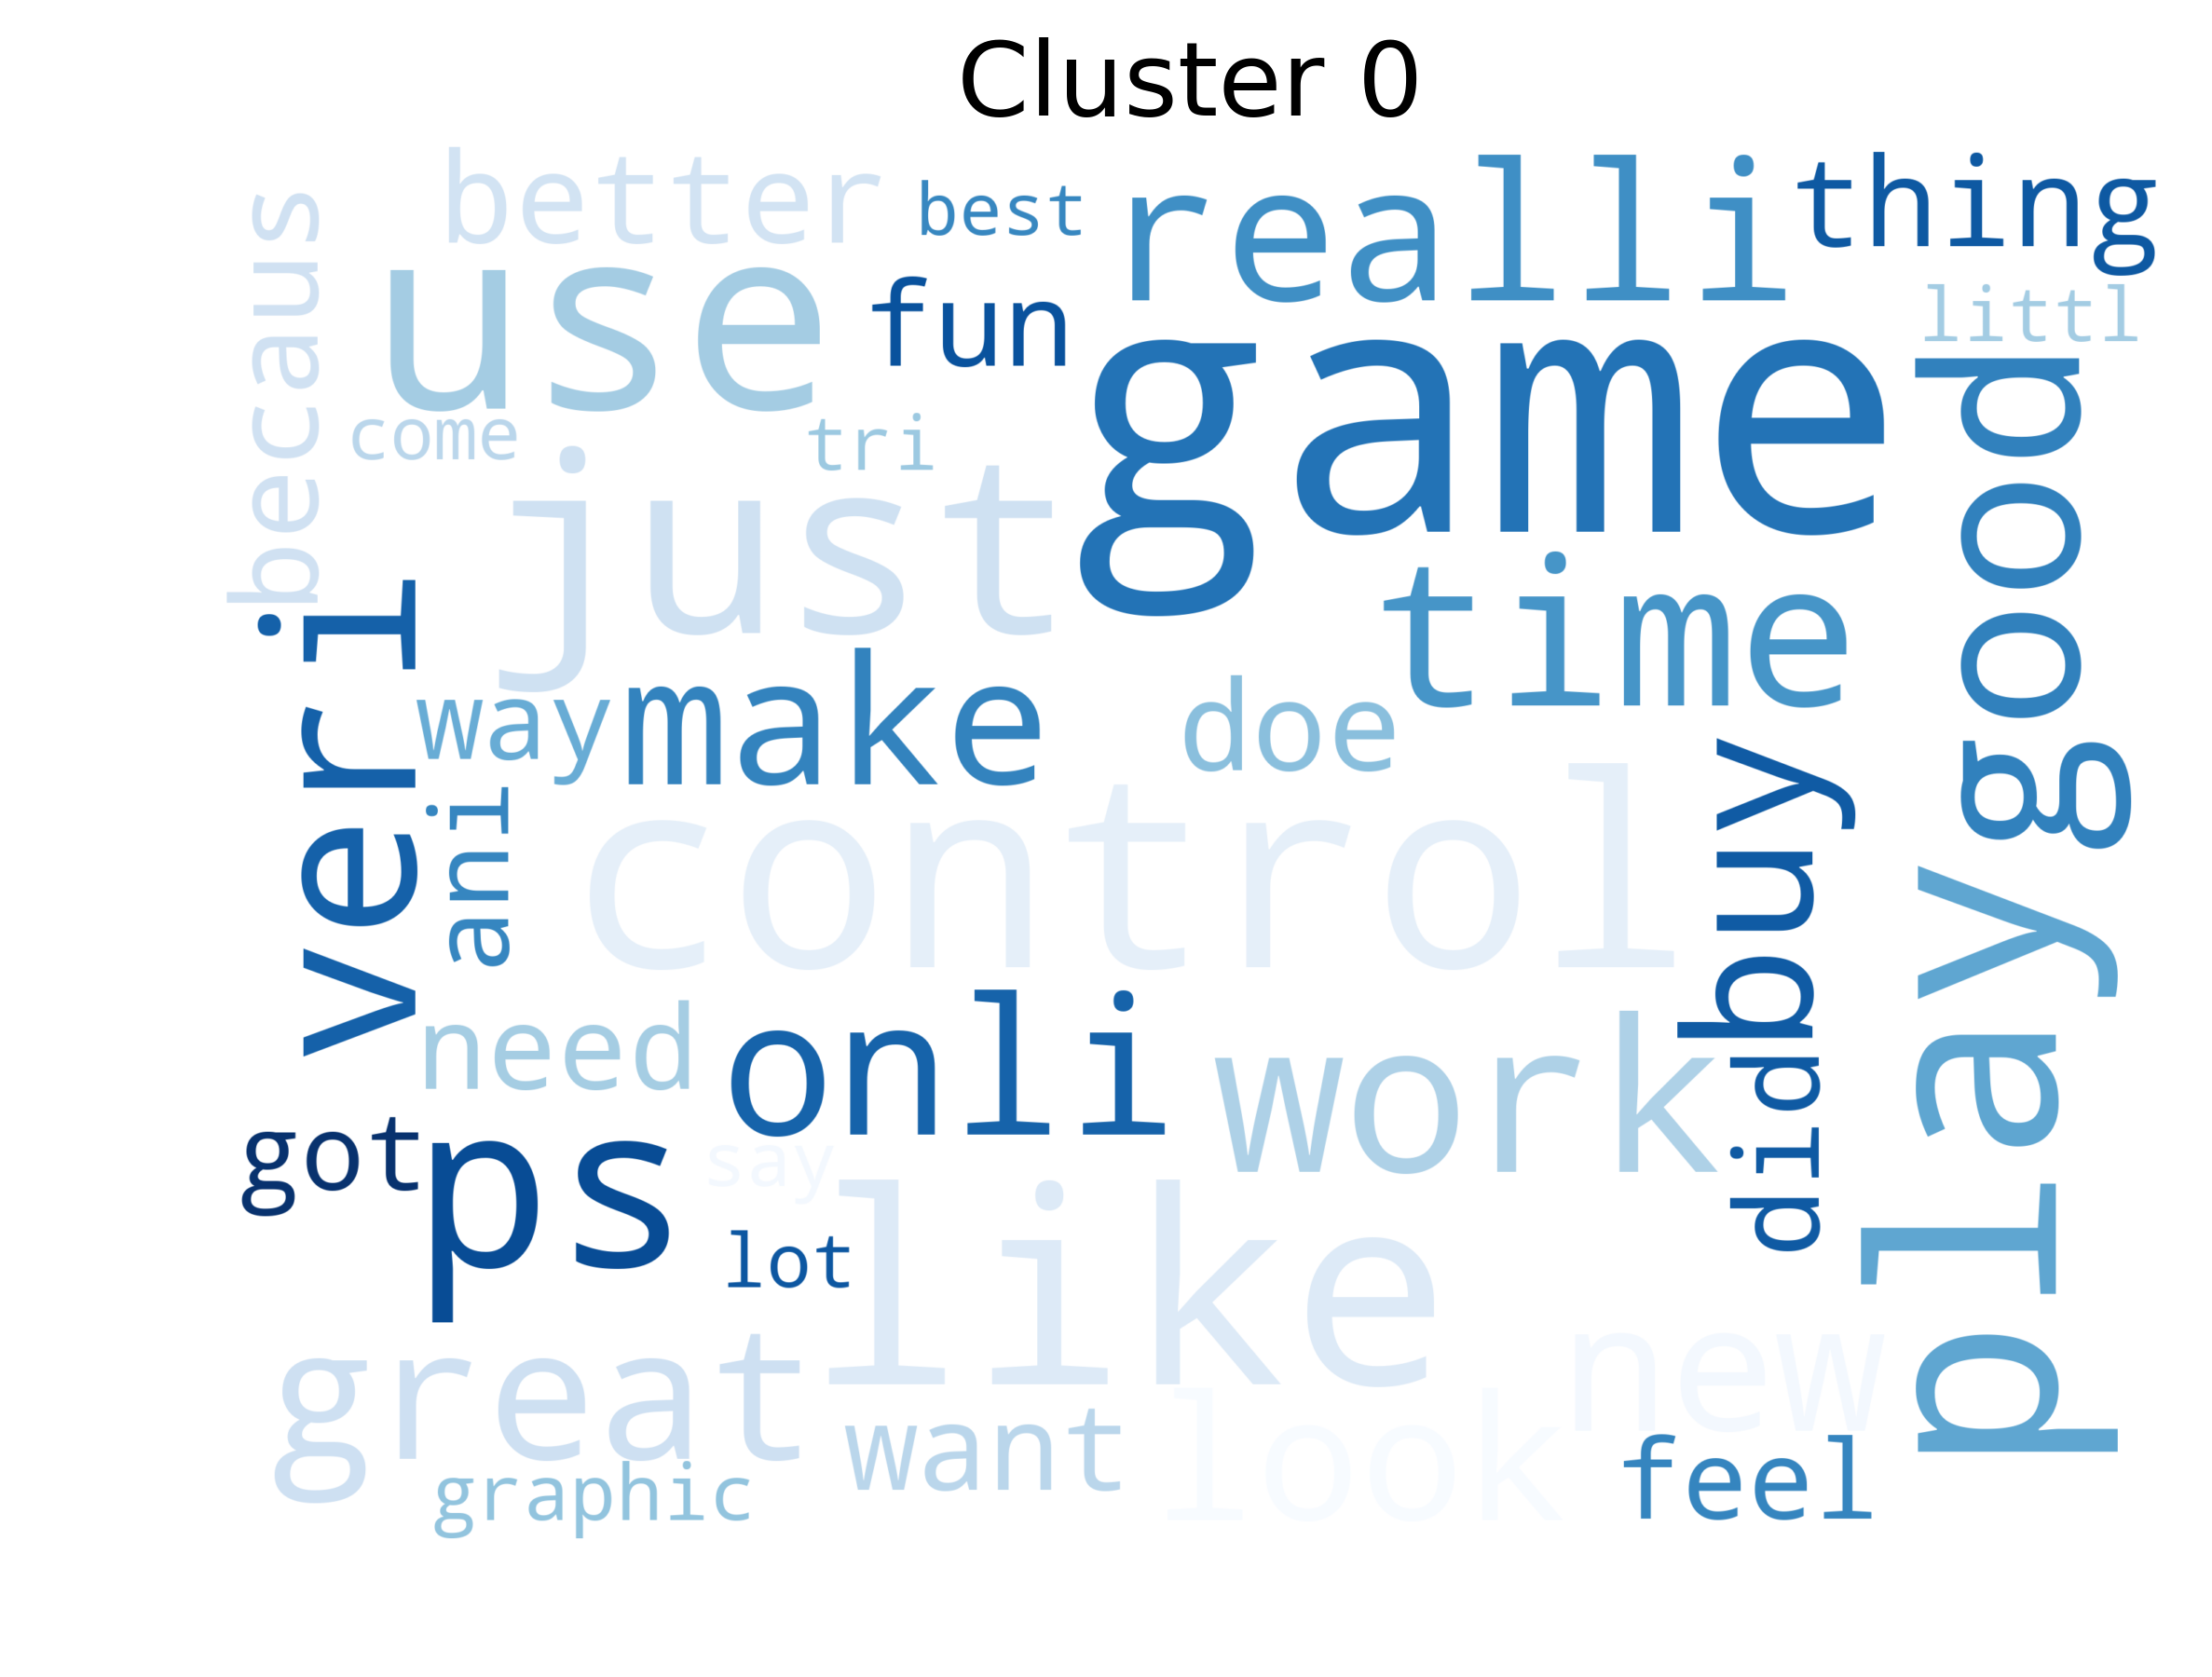

In [92]:
# Creo e visualizzo le wordclouds

# Cluster 0

# Creo il layout
fig, ax = plt.subplots(figsize=[7,5], dpi=400)
# Definisco le caratteristiche della word cloud
wordcloud = WordCloud(width=2800,
                      height=2000,
                      max_font_size=500,
                      min_font_size=100,
                      collocations=False, 
                      colormap = 'Blues', 
                      background_color = 'white').fit_words(dict_list[0])
# Mostro la word cloud
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_title('Cluster 0', fontsize = 20)
ax.axis("off")

In [93]:
# 10 parole più presenti nel cluster
{k: wordcloud.words_[k] for k in list(wordcloud.words_)[:10]}

{'game': 1.0,
 'like': 0.5331493945026148,
 'control': 0.5300555279775578,
 'use': 0.49081652678849724,
 'play': 0.48195052122415516,
 'just': 0.44537824827124434,
 'ps': 0.3867794927444212,
 'good': 0.33747388107084725,
 'work': 0.3274765362548053,
 'veri': 0.31476628609029933}

(-0.5, 2799.5, 1999.5, -0.5)

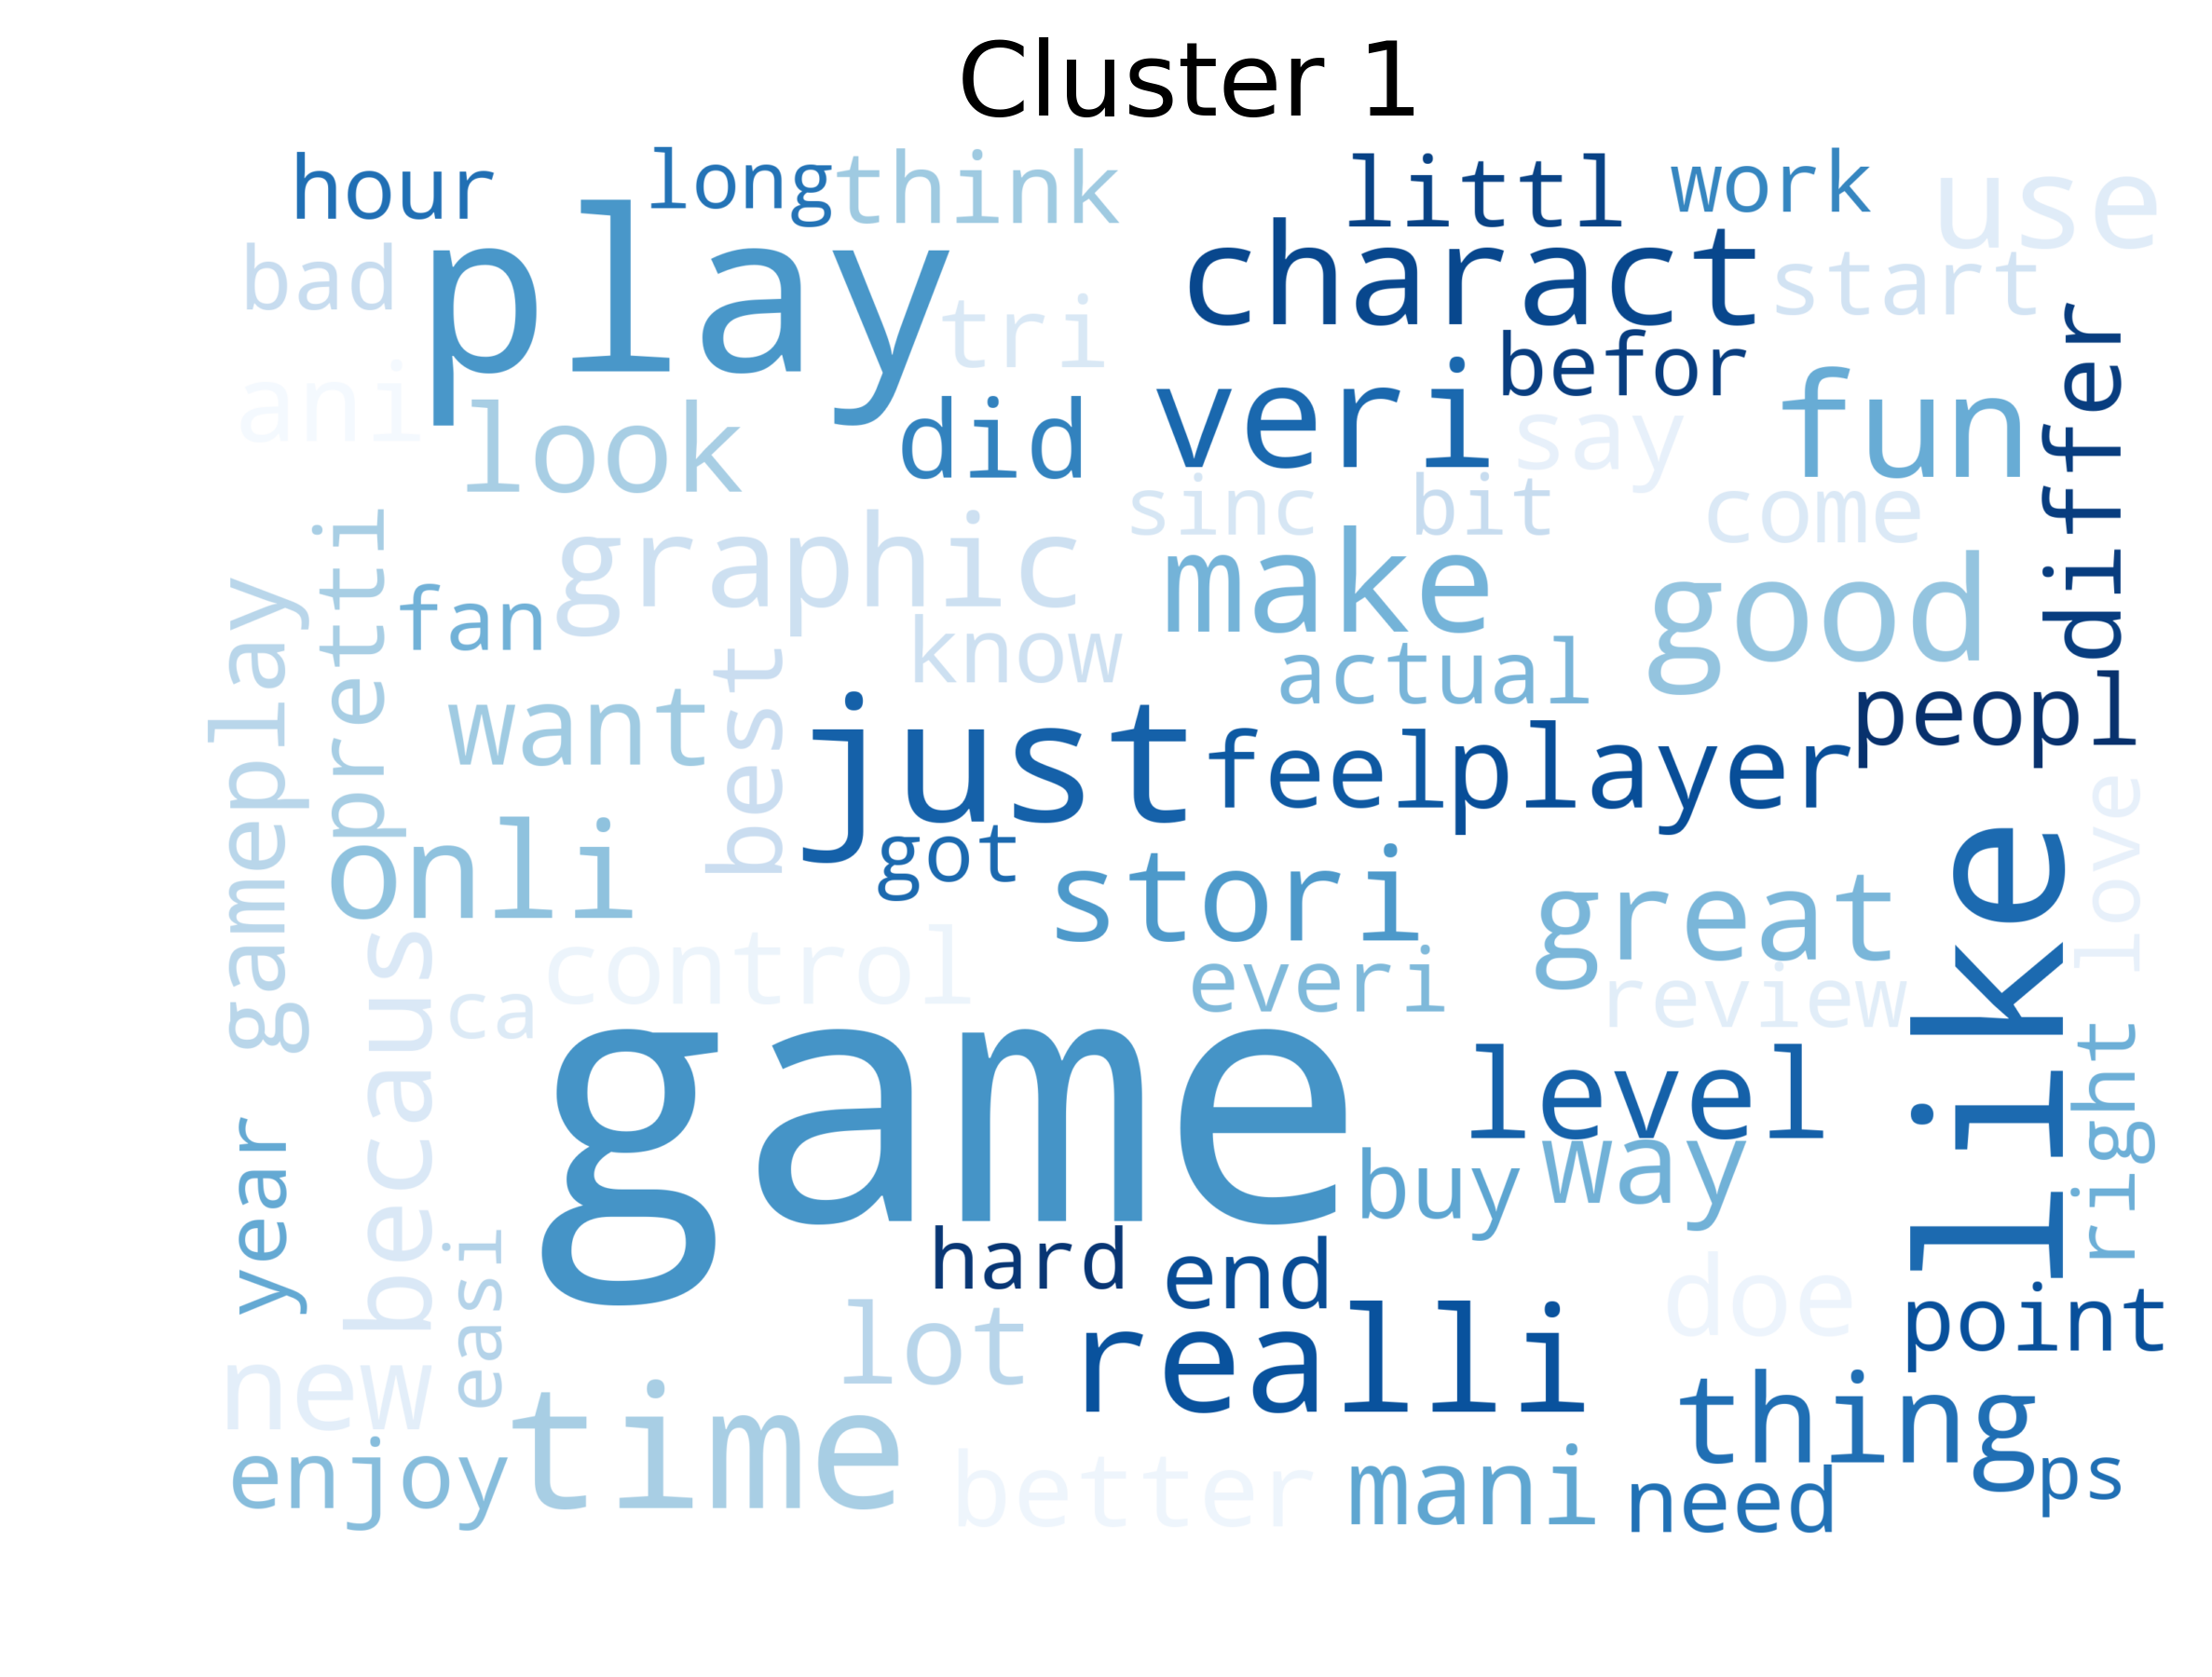

In [94]:
# Cluster 1

# Creo il layout
fig, ax = plt.subplots(figsize=[7,5], dpi=400)
# Definisco le caratteristiche della word cloud
wordcloud = WordCloud(width=2800,
                      height=2000,
                      max_font_size=500,
                      min_font_size=100,
                      collocations=False, 
                      colormap = 'Blues', 
                      background_color = 'white').fit_words(dict_list[1])
# Mostro la word cloud
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_title('Cluster 1', fontsize = 20)
ax.axis("off")

In [95]:
# 10 parole più presenti nel cluster
{k: wordcloud.words_[k] for k in list(wordcloud.words_)[:10]}

{'game': 1.0,
 'play': 0.2857442510522068,
 'like': 0.22104664365415572,
 'just': 0.1570968668633522,
 'time': 0.15515433126159936,
 'realli': 0.11195115389350709,
 'veri': 0.11081002822604548,
 'good': 0.1092995471976872,
 'fun': 0.10871359455725235,
 'charact': 0.10382191599673508}

(-0.5, 2799.5, 1999.5, -0.5)

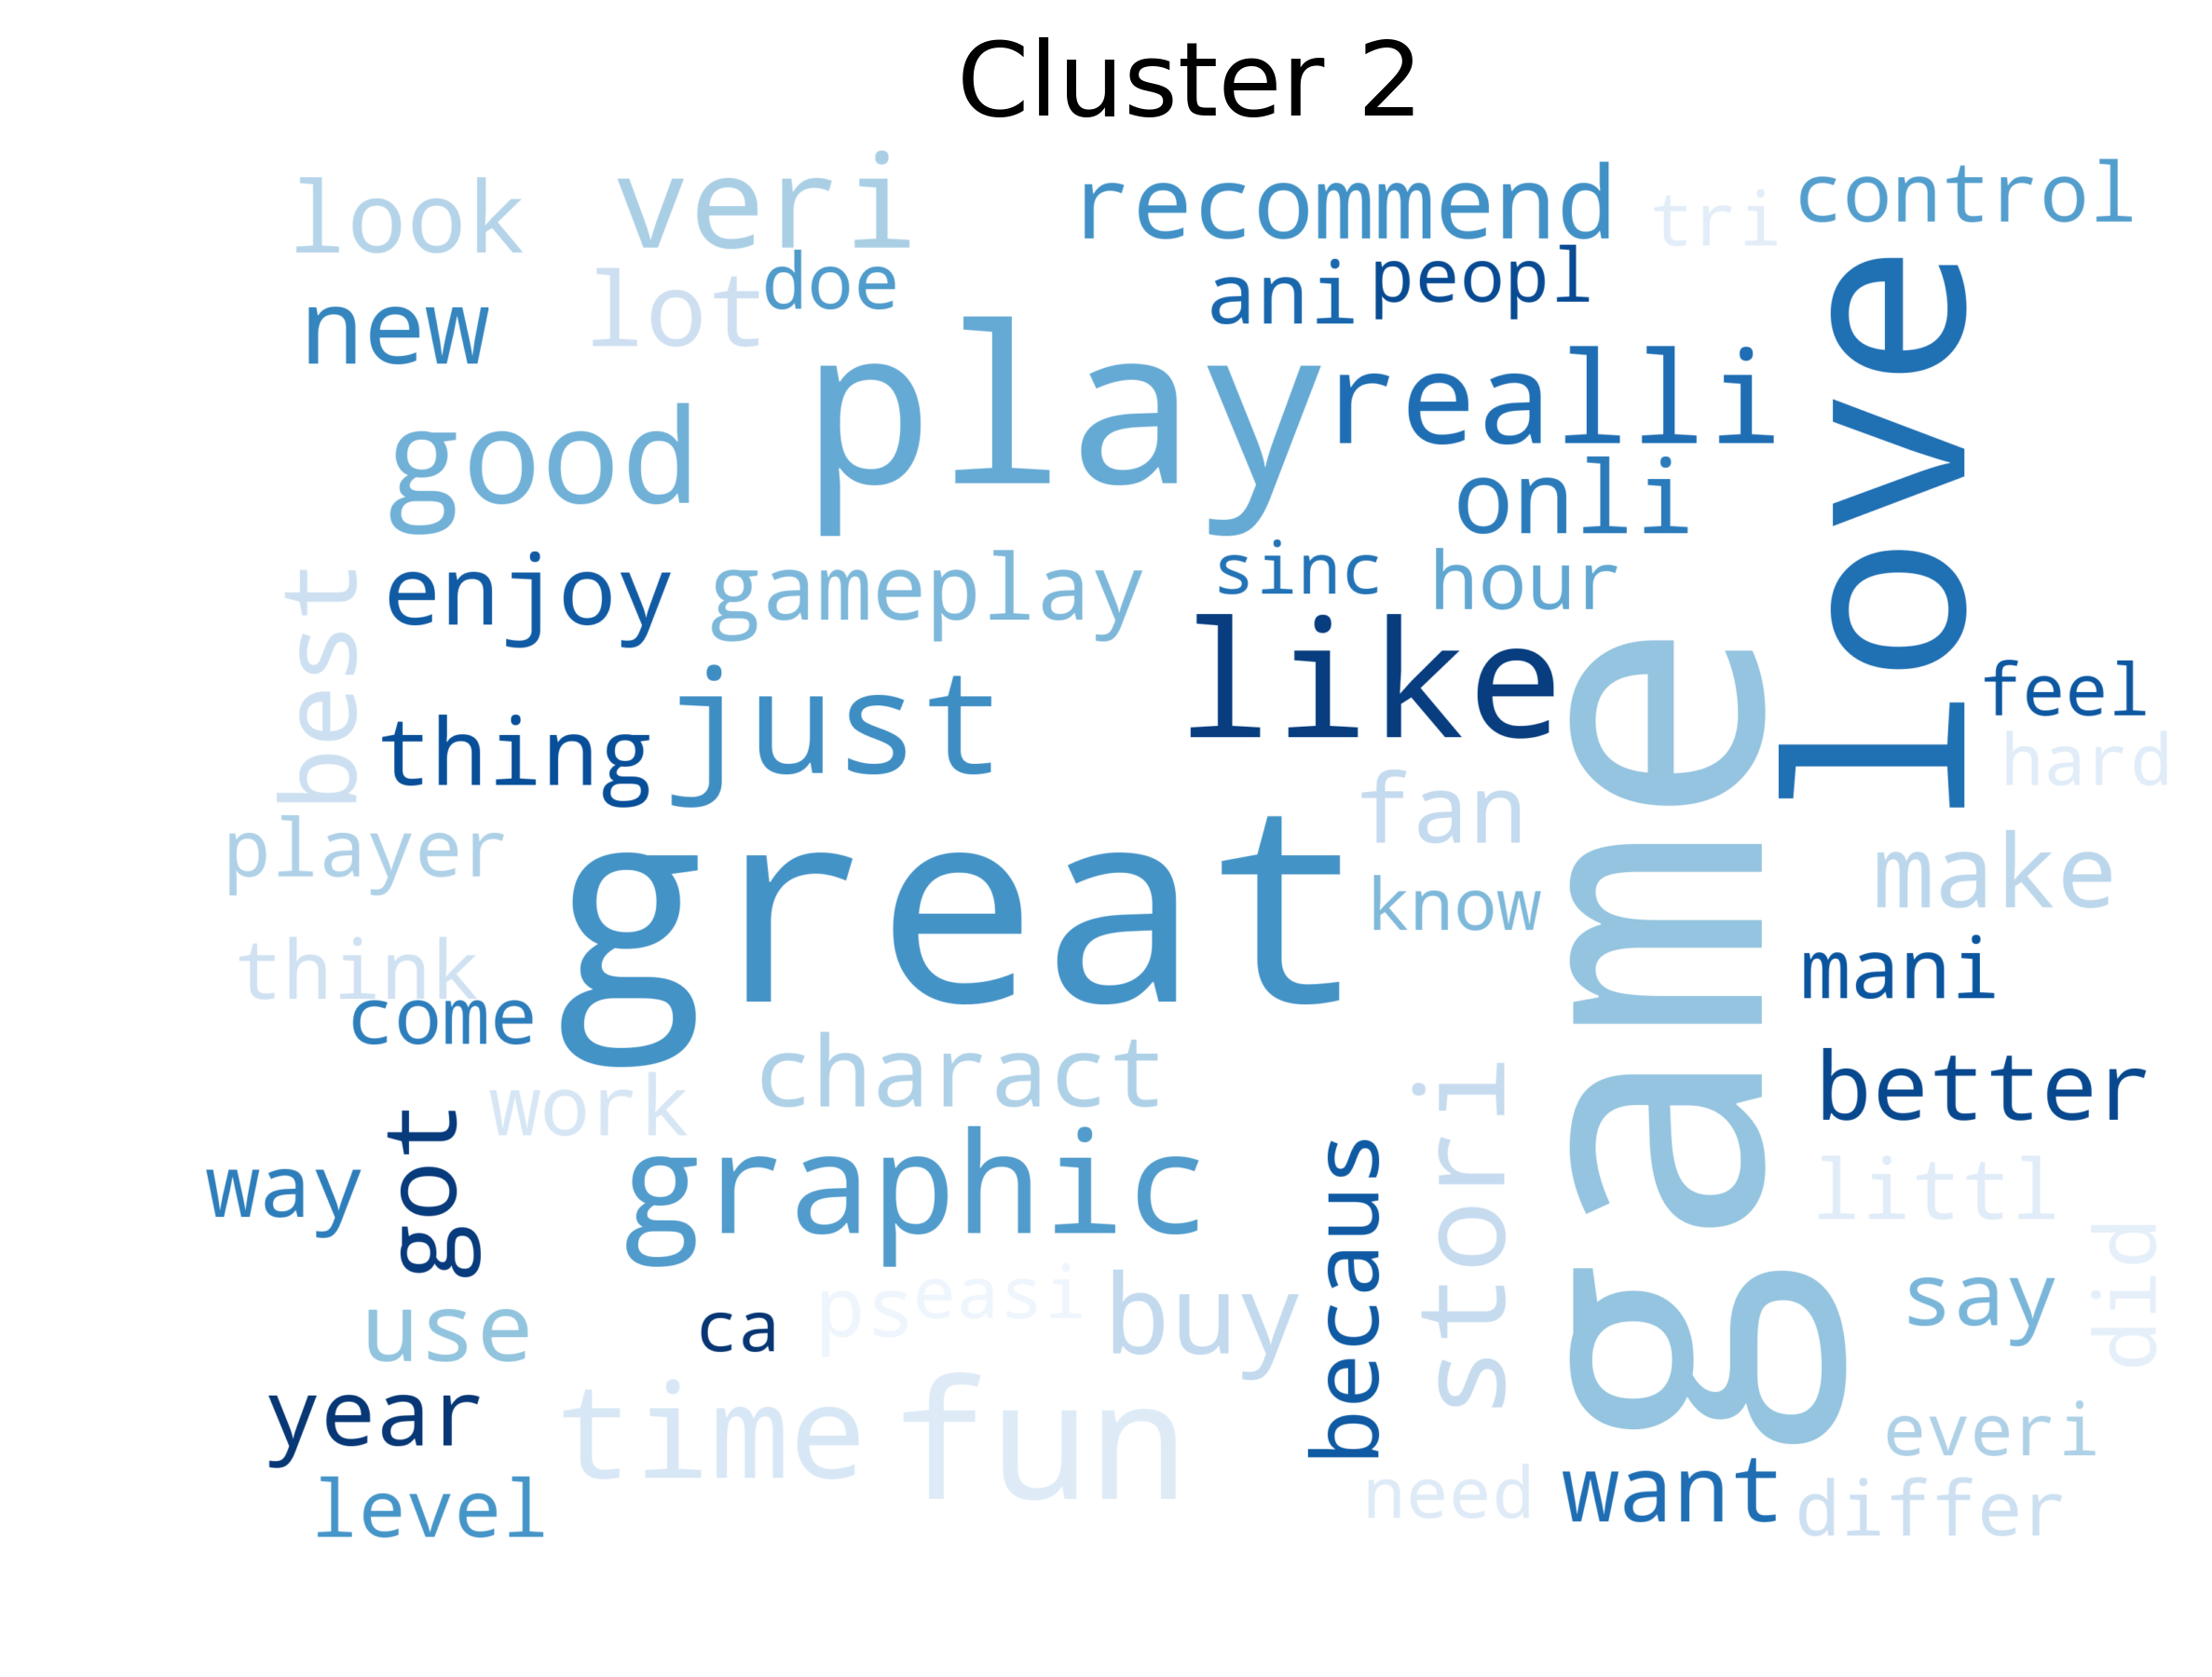

In [96]:
# Cluster 2

# Creo il layout
fig, ax = plt.subplots(figsize=[7,5], dpi=400)
# Definisco le caratteristiche della word cloud
wordcloud = WordCloud(width=2800,
                      height=2000,
                      max_font_size=500,
                      min_font_size=100,
                      collocations=False, 
                      colormap = 'Blues', 
                      background_color = 'white').fit_words(dict_list[2])
# Mostro la word cloud
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_title('Cluster 2', fontsize = 20)
ax.axis("off")

In [97]:
# 10 parole più presenti nel cluster
{k: wordcloud.words_[k] for k in list(wordcloud.words_)[:10]}

{'game': 1.0,
 'great': 0.5505111878027835,
 'love': 0.43782303666618055,
 'play': 0.3470892269803464,
 'fun': 0.17500283543155268,
 'like': 0.16735527147231807,
 'just': 0.12772403959882694,
 'graphic': 0.12354380336687243,
 'good': 0.10766538667185145,
 'time': 0.10549425622579756}

Dall'analisi si vede che anche in questo caso la parola più usata è __game__. Inoltre si nota che:
+    Nel primo cluster si manifesta la voglia di cotrollo dal prodotto con parole come: __control, use__;
+    Nel secondo e terzo cluster si manifesta l'amore per il prodotto con parole come: __like, great, love__.

## VISUALIZZAZIONE DEI CLUSTER

In questa sezione finale vengono visualizzati le prime e le ultime recensioni per ogni cluster di ogni modello in formato tabellare tratti direttamente dal dataset.

### 5 Clusters

In [98]:
review_df_5 = review_df.set_index('5C')

In [99]:
# Cluster 0
review_df_5.loc['0']

product  \
5C                                                      
0   Dirt 3 is a popular rally racing game for Play...   
0   These are the official Disney Microphones for ...   
0   These are the official Disney Microphones for ...   
0   Nintendo's thematic action-adventure sequel to...   
0   Nintendo's thematic action-adventure sequel to...   
0                                      Tom Clancy's H   
0   Ship Simulator 2008 puts players at the helm o...   
0   The premium silicone material provides better ...   
0   In most role-playing games, the player finds h...   
0   In most role-playing games, the player finds h...   
0                 In a world covered by endless water   
0   All of your favorite characters from Marvel Co...   
0   All of your favorite characters from Marvel Co...   
0   Prepare to enter a world "torn asunder" by tim...   
0         They're all here Heihachi Paul Phoenix King   
0   It's overwhelmingly sad how clones of Eidos In...   
0   Fighting Force, from the same developers that ...   
0   The first of the now-famousTomb Raidergames is...   
0   The first of the now-famousTomb Raidergames is...   
0   Westwood Studios proudly presentsTiberian Sun,...   
0   The enormous Playstation console smash hitFina...   
0   The enormous Playstation console smash hitFina...   
0   A trip into Mexico's Day of the Dead, where yo...   
0   You awaken in a small, enclosed room with meta...   
0   One of the best snowboarding games on any plat...   
0   Crash Bandicoot, the poster marsupial for Play...   
0   Crash Bandicoot, the poster marsupial for Play...   
0   GoldenEye 007has been a huge success for Rarew...   
0   GoldenEye 007has been a huge success for Rarew...   
0   GoldenEye 007has been a huge success for Rarew...   
..                                                ...   
0                                          B00IFWTJ16   
0                                          B00IGI3G3G   
0                                          B00IGI3G3G   
0                                          B00IGI3G3G   
0   Nintendo 3DS XL - Yoshi Edition**Does not incl...   
0   Nintendo 3DS XL - Yoshi Edition**Does not incl...   
0   Nintendo 3DS XL - Yoshi Edition**Does not incl...   
0   Nintendo 3DS XL - Yoshi Edition**Does not incl...   
0                                          B00IIHU44E   
0                                          B00IIHU44E   
0                                          B00IIHU44E   
0                                          B00IIHU44E   
0                                          B00IIHU44E   
0                                          B00IIHU44E   
0   This edition of Trials Fusion includes both th...   
0   Logitech G502 Proteus Core Tunable Gaming Mous...   
0   Power Saves PRO is your key to blow your games...   
0                                          B00IYWV5HS   
0   Protect your PS Vita 2000 (new slim model) wit...   
0                                          B00J06HWC4   
0   Developed by Spiders Studio for PlayStation 3,...   
0                                          B00JM3R6M6   
0                                          B00JQHU9RC   
0                                          B00JQHU9RC   
0                                          B00JQHU9RC   
0                                          B00JQHU9RC   
0                                          B00JQHU9RC   
0                                          B00JQHU9RC   
0                                          B00KAI3KW2   
0                                          B00KAI3KW2   

                               reviewerName  rating  reviewYear 3C  actual  \
5C                                                                           
0                                       Bob     5.0        2011  2       0   
0                                LaTavia E.     5.0        2014  0       0   
0                                       Pam     5.0        2014  2       0   
0                                  chadwick     5.0        2012 

In [100]:
# Cluster 1
review_df_5.loc['1']

product  \
5C                                                      
1   Dirt 3 is a popular rally racing game for Play...   
1   Dirt 3 is a popular rally racing game for Play...   
1   Dirt 3 is a popular rally racing game for Play...   
1   Dirt 3 is a popular rally racing game for Play...   
1   Dirt 3 is a popular rally racing game for Play...   
1   Dirt 3 is a popular rally racing game for Play...   
1   Dirt 3 is a popular rally racing game for Play...   
1   Dirt 3 is a popular rally racing game for Play...   
1   Dirt 3 is a popular rally racing game for Play...   
1   Dirt 3 is a popular rally racing game for Play...   
1   Dirt 3 is a popular rally racing game for Play...   
1   Dirt 3 is a popular rally racing game for Play...   
1   Nintendo's thematic action-adventure sequel to...   
1   Nintendo's thematic action-adventure sequel to...   
1                                      Tom Clancy's H   
1   Ship Simulator 2008 puts players at the helm o...   
1   Ship Simulator 2008 puts players at the helm o...   
1   64MB 1019 Block Memory Card compatible for Wii...   
1   2 Pack - Gator Crunch Wii Gamecube 6FT Extensi...   
1   The old characters from the original tongue-in...   
1   The old characters from the original tongue-in...   
1   In most role-playing games, the player finds h...   
1   In most role-playing games, the player finds h...   
1   In most role-playing games, the player finds h...   
1   In most role-playing games, the player finds h...   
1   What fighting game fan could pass up this perf...   
1                 In a world covered by endless water   
1                 In a world covered by endless water   
1                 In a world covered by endless water   
1                 In a world covered by endless water   
..                                                ...   
1   Developed by Spiders Studio for PlayStation 3,...   
1   Developed by Spiders Studio for PlayStation 3,...   
1   A prequel to the original Drakengard, Drakenga...   
1   A prequel to the original Drakengard, Drakenga...   
1   A prequel to the original Drakengard, Drakenga...   
1   A prequel to the original Drakengard, Drakenga...   
1   A prequel to the original Drakengard, Drakenga...   
1                                          B00J9P3KBS   
1                                          B00JM3R6M6   
1                                          B00JM3R6M6   
1                                          B00JM3R6M6   
1                                          B00JM3R6M6   
1                                          B00JM3R6M6   
1                                          B00JM3R6M6   
1                                          B00JM3R6M6   
1   Ever since the Secret of the Scarlet Hand, the...   
1   Ever since the Secret of the Scarlet Hand, the...   
1   Ever since the Secret of the Scarlet Hand, the...   
1   Ever since the Secret of the Scarlet Hand, the...   
1   Ever since the Secret of the Scarlet Hand, the...   
1                                          B00JQHU9RC   
1                                          B00JQHU9RC   
1                                          B00JQHU9RC   
1                                          B00JQHU9RC   
1                                          B00JQHU9RC   
1                                          B00KAI3KW2   
1                                          B00KAI3KW2   
1                                          B00KAI3KW2   
1                                          B00KAI3KW2   
1                                          B00KAI3KW2   

                                       reviewerName  rating  reviewYear 3C  \
5C                                                                           
1                                               123     1.0        2012  1   
1                        Amazon Shopper "Mr.Repsol"     1.0        2014  0   
1                                          ampgreen     3.0        2011  1   
1                      Angry Ryan "Ryan A. Forrest"     4.0     

In [101]:
# Cluster 2
review_df_5.loc['2']

product  \
5C                                                      
2   Dirt 3 is a popular rally racing game for Play...   
2   Dirt 3 is a popular rally racing game for Play...   
2   Dirt 3 is a popular rally racing game for Play...   
2   Dirt 3 is a popular rally racing game for Play...   
2   Dirt 3 is a popular rally racing game for Play...   
2   Dirt 3 is a popular rally racing game for Play...   
2   Dirt 3 is a popular rally racing game for Play...   
2   Dirt 3 is a popular rally racing game for Play...   
2   Nintendo's thematic action-adventure sequel to...   
2   Nintendo's thematic action-adventure sequel to...   
2                                      Tom Clancy's H   
2   The old characters from the original tongue-in...   
2   The old characters from the original tongue-in...   
2   The old characters from the original tongue-in...   
2   In most role-playing games, the player finds h...   
2   In most role-playing games, the player finds h...   
2   In most role-playing games, the player finds h...   
2   In most role-playing games, the player finds h...   
2   In most role-playing games, the player finds h...   
2   In most role-playing games, the player finds h...   
2   In most role-playing games, the player finds h...   
2   In most role-playing games, the player finds h...   
2   What fighting game fan could pass up this perf...   
2   What fighting game fan could pass up this perf...   
2   What fighting game fan could pass up this perf...   
2   What fighting game fan could pass up this perf...   
2                 In a world covered by endless water   
2                 In a world covered by endless water   
2                 In a world covered by endless water   
2   All of your favorite characters from Marvel Co...   
..                                                ...   
2   Developed by Spiders Studio for PlayStation 3,...   
2   A prequel to the original Drakengard, Drakenga...   
2   A prequel to the original Drakengard, Drakenga...   
2   A prequel to the original Drakengard, Drakenga...   
2   A prequel to the original Drakengard, Drakenga...   
2   A prequel to the original Drakengard, Drakenga...   
2   A prequel to the original Drakengard, Drakenga...   
2   A prequel to the original Drakengard, Drakenga...   
2   A prequel to the original Drakengard, Drakenga...   
2   A prequel to the original Drakengard, Drakenga...   
2                                          B00JM3R6M6   
2                                          B00JM3R6M6   
2                                          B00JM3R6M6   
2                                          B00JM3R6M6   
2                                          B00JM3R6M6   
2                                          B00JM3R6M6   
2                                          B00JM3R6M6   
2   Ever since the Secret of the Scarlet Hand, the...   
2   Ever since the Secret of the Scarlet Hand, the...   
2   Ever since the Secret of the Scarlet Hand, the...   
2   Ever since the Secret of the Scarlet Hand, the...   
2                                          B00JQHU9RC   
2                                          B00JQHU9RC   
2                                          B00JQHU9RC   
2                                          B00JQHU9RC   
2                                          B00KAI3KW2   
2                                          B00KAI3KW2   
2                                          B00KAI3KW2   
2                                          B00KAI3KW2   
2                                          B00KAI3KW2   

                                        reviewerName  rating  reviewYear 3C  \
5C                                                                            
2                                      Chesty Puller     1.0        2012  1   
2                                        Henri Savin     5.0        2011  1   
2                                          Moviedude     4.0        2012  1   
2                                       Paulo Coelho     1.

In [102]:
# Cluster 3
review_df_5.loc['3']

product  \
5C                                                      
3   Dirt 3 is a popular rally racing game for Play...   
3   Dirt 3 is a popular rally racing game for Play...   
3   Dirt 3 is a popular rally racing game for Play...   
3   Dirt 3 is a popular rally racing game for Play...   
3   These are the official Disney Microphones for ...   
3   These are the official Disney Microphones for ...   
3   These are the official Disney Microphones for ...   
3   These are the official Disney Microphones for ...   
3   These are the official Disney Microphones for ...   
3   Nintendo's thematic action-adventure sequel to...   
3   Nintendo's thematic action-adventure sequel to...   
3   Having stunning Nintendo Wii High Definition G...   
3   Having stunning Nintendo Wii High Definition G...   
3   Having stunning Nintendo Wii High Definition G...   
3   Having stunning Nintendo Wii High Definition G...   
3   Having stunning Nintendo Wii High Definition G...   
3   Having stunning Nintendo Wii High Definition G...   
3                                      Tom Clancy's H   
3                                      Tom Clancy's H   
3   Ship Simulator 2008 puts players at the helm o...   
3   Ship Simulator 2008 puts players at the helm o...   
3   The premium silicone material provides better ...   
3   The premium silicone material provides better ...   
3   The premium silicone material provides better ...   
3   The premium silicone material provides better ...   
3   The premium silicone material provides better ...   
3   The premium silicone material provides better ...   
3   The premium silicone material provides better ...   
3   The premium silicone material provides better ...   
3   The premium silicone material provides better ...   
..                                                ...   
3                                          B00J9P3KBS   
3                                          B00J9P3KBS   
3                                          B00J9P3KBS   
3                                          B00J9P3KBS   
3                                          B00J9P3KBS   
3                                          B00JM3R6M6   
3                                          B00JM3R6M6   
3   Ever since the Secret of the Scarlet Hand, the...   
3                                          B00JQHU9RC   
3                                          B00JQHU9RC   
3                                          B00JQHU9RC   
3                                          B00JQHU9RC   
3   Announcing:\nA high quality ergonomic gaming m...   
3   Announcing:\nA high quality ergonomic gaming m...   
3   Announcing:\nA high quality ergonomic gaming m...   
3   Announcing:\nA high quality ergonomic gaming m...   
3   Announcing:\nA high quality ergonomic gaming m...   
3   Announcing:\nA high quality ergonomic gaming m...   
3   Announcing:\nA high quality ergonomic gaming m...   
3   Announcing:\nA high quality ergonomic gaming m...   
3                                          B00KAI3KW2   
3                                          B00KAI3KW2   
3                                          B00KAI3KW2   
3                                          B00KAI3KW2   
3                                          B00KAI3KW2   
3                Nintendo Wii U 32GB Mario Kart Bundl   
3                Nintendo Wii U 32GB Mario Kart Bundl   
3                Nintendo Wii U 32GB Mario Kart Bundl   
3                Nintendo Wii U 32GB Mario Kart Bundl   
3                Nintendo Wii U 32GB Mario Kart Bundl   

                                        reviewerName  rating  reviewYear 3C  \
5C                                                                            
3                 Alejandro Henao "Electronic Junky"     4.0        2013  0   
3                                      D. Sweetapple     2.0        2014  0   
3                                  Joseph R. Kennedy     1.0        2014  0   
3                          Lisa Gamuciello "Lisa G."     1.

In [103]:
# Cluster 4
review_df_5.loc['4']

product  \
5C                                                      
4   64MB 1019 Block Memory Card compatible for Wii...   
4   All of your favorite characters from Marvel Co...   
4   All of your favorite characters from Marvel Co...   
4                                       PLAY LIKE NEW   
4   Prepare to enter a world "torn asunder" by tim...   
4         They're all here Heihachi Paul Phoenix King   
4         They're all here Heihachi Paul Phoenix King   
4             Used In Good Condition and Working Orde   
4             Used In Good Condition and Working Orde   
4             Used In Good Condition and Working Orde   
4   Fighting Force, from the same developers that ...   
4   The first of the now-famousTomb Raidergames is...   
4   The enormous Playstation console smash hitFina...   
4   Crash Bandicoot, the poster marsupial for Play...   
4   Crash Bandicoot, the poster marsupial for Play...   
4   Crash Bandicoot, the poster marsupial for Play...   
4   Crash Bandicoot, the poster marsupial for Play...   
4   GoldenEye 007has been a huge success for Rarew...   
4   GoldenEye 007has been a huge success for Rarew...   
4   Gran Turismois the new definition of a great r...   
4   Gran Turismois the new definition of a great r...   
4   Gran Turismois the new definition of a great r...   
4   The Legend of Zelda: Ocarina of Timemay be the...   
4   The Legend of Zelda: Ocarina of Timemay be the...   
4   She's back! Action heroine Lara Croft returns ...   
4   WCW/nWo Revengeimproves on its predecessor,WCW vs   
4   The game that launched the Nintendo 64 system ...   
4   The game that launched the Nintendo 64 system ...   
4   Spyro is a cute purple dragon in a bit of a pi...   
4   Spyro is a cute purple dragon in a bit of a pi...   
..                                                ...   
4                                          B00IPTUJ8G   
4                                          B00IPTUJ8G   
4   Protect your PS Vita 2000 (new slim model) wit...   
4   FINAL FANTASY XIV: A Realm Reborn is a massive...   
4   FINAL FANTASY XIV: A Realm Reborn is a massive...   
4   FINAL FANTASY XIV: A Realm Reborn is a massive...   
4   Developed by Spiders Studio for PlayStation 3,...   
4   Developed by Spiders Studio for PlayStation 3,...   
4                                          B00JQHU9RC   
4                                          B00JQHU9RC   
4                                          B00JQHU9RC   
4                                          B00JQHU9RC   
4                                          B00JQHU9RC   
4                                          B00JQHU9RC   
4                                          B00JQHU9RC   
4                                          B00JQHU9RC   
4                                          B00JQHU9RC   
4                                          B00JQHU9RC   
4                                          B00KAI3KW2   
4                                          B00KAI3KW2   
4                                          B00KAI3KW2   
4                                          B00KAI3KW2   
4                                          B00KAI3KW2   
4                                          B00KAI3KW2   
4                                          B00KAI3KW2   
4                                          B00KAI3KW2   
4                                          B00KAI3KW2   
4                                          B00KAI3KW2   
4                                          B00KAI3KW2   
4                Nintendo Wii U 32GB Mario Kart Bundl   

                                        reviewerName  rating  reviewYear 3C  \
5C                                                                            
4                                           desorbod     5.0        2013  0   
4                                               Eric     2.0        2003  0   
4                               N. Durham "Big Evil"     2.0        2005  2   
4                                              Jason     5.

### 3 Clusters

In [104]:
review_df_3 = review_df.set_index('3C')

In [105]:
# Cluster 0
review_df_3.loc['0']

product  \
3C                                                      
0   Dirt 3 is a popular rally racing game for Play...   
0   Dirt 3 is a popular rally racing game for Play...   
0   Dirt 3 is a popular rally racing game for Play...   
0   Dirt 3 is a popular rally racing game for Play...   
0   Dirt 3 is a popular rally racing game for Play...   
0   Dirt 3 is a popular rally racing game for Play...   
0   Dirt 3 is a popular rally racing game for Play...   
0   These are the official Disney Microphones for ...   
0   These are the official Disney Microphones for ...   
0   These are the official Disney Microphones for ...   
0   These are the official Disney Microphones for ...   
0   These are the official Disney Microphones for ...   
0   These are the official Disney Microphones for ...   
0   Nintendo's thematic action-adventure sequel to...   
0   Nintendo's thematic action-adventure sequel to...   
0   Nintendo's thematic action-adventure sequel to...   
0   Having stunning Nintendo Wii High Definition G...   
0   Having stunning Nintendo Wii High Definition G...   
0   Having stunning Nintendo Wii High Definition G...   
0   Having stunning Nintendo Wii High Definition G...   
0   Having stunning Nintendo Wii High Definition G...   
0   Having stunning Nintendo Wii High Definition G...   
0                                      Tom Clancy's H   
0                                      Tom Clancy's H   
0   Ship Simulator 2008 puts players at the helm o...   
0   Ship Simulator 2008 puts players at the helm o...   
0   The premium silicone material provides better ...   
0   The premium silicone material provides better ...   
0   The premium silicone material provides better ...   
0   The premium silicone material provides better ...   
..                                                ...   
0   Announcing:\nA high quality ergonomic gaming m...   
0   Announcing:\nA high quality ergonomic gaming m...   
0   Announcing:\nA high quality ergonomic gaming m...   
0   Announcing:\nA high quality ergonomic gaming m...   
0   Announcing:\nA high quality ergonomic gaming m...   
0   Announcing:\nA high quality ergonomic gaming m...   
0                                          B00KAI3KW2   
0                                          B00KAI3KW2   
0                                          B00KAI3KW2   
0                                          B00KAI3KW2   
0                                          B00KAI3KW2   
0                                          B00KAI3KW2   
0                                          B00KAI3KW2   
0                                          B00KAI3KW2   
0                                          B00KAI3KW2   
0                                          B00KAI3KW2   
0                                          B00KAI3KW2   
0                                          B00KAI3KW2   
0                                          B00KAI3KW2   
0                                          B00KAI3KW2   
0                                          B00KAI3KW2   
0                                          B00KAI3KW2   
0                                          B00KAI3KW2   
0                                          B00KAI3KW2   
0                Nintendo Wii U 32GB Mario Kart Bundl   
0                Nintendo Wii U 32GB Mario Kart Bundl   
0                Nintendo Wii U 32GB Mario Kart Bundl   
0                Nintendo Wii U 32GB Mario Kart Bundl   
0                Nintendo Wii U 32GB Mario Kart Bundl   
0                Nintendo Wii U 32GB Mario Kart Bundl   

                                        reviewerName  rating  reviewYear 5C  \
3C                                                                            
0                 Alejandro Henao "Electronic Junky"     4.0        2013  3   
0                         Amazon Shopper "Mr.Repsol"     1.0        2014  1   
0                                      D. Sweetapple     2.0        2014  3   
0                                  Joseph R. Kennedy     1.

In [106]:
# Cluster 1
review_df_3.loc['1']

product  \
3C                                                      
1   Dirt 3 is a popular rally racing game for Play...   
1   Dirt 3 is a popular rally racing game for Play...   
1   Dirt 3 is a popular rally racing game for Play...   
1   Dirt 3 is a popular rally racing game for Play...   
1   Dirt 3 is a popular rally racing game for Play...   
1   Dirt 3 is a popular rally racing game for Play...   
1   Dirt 3 is a popular rally racing game for Play...   
1   Dirt 3 is a popular rally racing game for Play...   
1   Dirt 3 is a popular rally racing game for Play...   
1   Dirt 3 is a popular rally racing game for Play...   
1   Dirt 3 is a popular rally racing game for Play...   
1   Dirt 3 is a popular rally racing game for Play...   
1   Dirt 3 is a popular rally racing game for Play...   
1   Dirt 3 is a popular rally racing game for Play...   
1   Dirt 3 is a popular rally racing game for Play...   
1   Dirt 3 is a popular rally racing game for Play...   
1   Dirt 3 is a popular rally racing game for Play...   
1   Nintendo's thematic action-adventure sequel to...   
1   Nintendo's thematic action-adventure sequel to...   
1   Nintendo's thematic action-adventure sequel to...   
1                                      Tom Clancy's H   
1                                      Tom Clancy's H   
1   Ship Simulator 2008 puts players at the helm o...   
1   Ship Simulator 2008 puts players at the helm o...   
1   64MB 1019 Block Memory Card compatible for Wii...   
1   2 Pack - Gator Crunch Wii Gamecube 6FT Extensi...   
1   The old characters from the original tongue-in...   
1   The old characters from the original tongue-in...   
1   The old characters from the original tongue-in...   
1   The old characters from the original tongue-in...   
..                                                ...   
1                                          B00JM3R6M6   
1                                          B00JM3R6M6   
1                                          B00JM3R6M6   
1                                          B00JM3R6M6   
1                                          B00JM3R6M6   
1                                          B00JM3R6M6   
1                                          B00JM3R6M6   
1   Ever since the Secret of the Scarlet Hand, the...   
1   Ever since the Secret of the Scarlet Hand, the...   
1   Ever since the Secret of the Scarlet Hand, the...   
1   Ever since the Secret of the Scarlet Hand, the...   
1   Ever since the Secret of the Scarlet Hand, the...   
1   Ever since the Secret of the Scarlet Hand, the...   
1   Ever since the Secret of the Scarlet Hand, the...   
1   Ever since the Secret of the Scarlet Hand, the...   
1   Ever since the Secret of the Scarlet Hand, the...   
1                                          B00JQHU9RC   
1                                          B00JQHU9RC   
1                                          B00JQHU9RC   
1                                          B00JQHU9RC   
1                                          B00JQHU9RC   
1                                          B00JQHU9RC   
1                                          B00JQHU9RC   
1                                          B00JQHU9RC   
1                                          B00JQHU9RC   
1                                          B00JQHU9RC   
1                                          B00KAI3KW2   
1                                          B00KAI3KW2   
1                                          B00KAI3KW2   
1                                          B00KAI3KW2   

                                        reviewerName  rating  reviewYear 5C  \
3C                                                                            
1                                                123     1.0        2012  1   
1                                           ampgreen     3.0        2011  1   
1                       Angry Ryan "Ryan A. Forrest"     4.0        2011  1   
1                                             A.R.G.     4.

In [107]:
# Cluster 2
review_df_3.loc['2']

product  \
3C                                                      
2   Dirt 3 is a popular rally racing game for Play...   
2   These are the official Disney Microphones for ...   
2   Nintendo's thematic action-adventure sequel to...   
2   Nintendo's thematic action-adventure sequel to...   
2                                      Tom Clancy's H   
2   Ship Simulator 2008 puts players at the helm o...   
2   The premium silicone material provides better ...   
2   The premium silicone material provides better ...   
2   64MB 1019 Block Memory Card compatible for Wii...   
2   64MB 1019 Block Memory Card compatible for Wii...   
2   2 Pack - Gator Crunch Wii Gamecube 6FT Extensi...   
2   In most role-playing games, the player finds h...   
2   In most role-playing games, the player finds h...   
2   In most role-playing games, the player finds h...   
2                 In a world covered by endless water   
2                 In a world covered by endless water   
2                 In a world covered by endless water   
2   All of your favorite characters from Marvel Co...   
2   All of your favorite characters from Marvel Co...   
2   All of your favorite characters from Marvel Co...   
2   Prepare to enter a world "torn asunder" by tim...   
2   Prepare to enter a world "torn asunder" by tim...   
2         They're all here Heihachi Paul Phoenix King   
2         They're all here Heihachi Paul Phoenix King   
2             Used In Good Condition and Working Orde   
2   It's overwhelmingly sad how clones of Eidos In...   
2   It's overwhelmingly sad how clones of Eidos In...   
2   Fighting Force, from the same developers that ...   
2   The unstoppable Lara Croft is back inTomb Raid...   
2   The first of the now-famousTomb Raidergames is...   
..                                                ...   
2   This edition of Trials Fusion includes both th...   
2                                          B00IPTUJ8G   
2   Mama is back in her gardening gloves planting ...   
2   Logitech G502 Proteus Core Tunable Gaming Mous...   
2   Logitech G502 Proteus Core Tunable Gaming Mous...   
2   Power Saves PRO is your key to blow your games...   
2                                          B00IYWV5HS   
2                                          B00J06HWC4   
2                                          B00J06HWC4   
2                                          B00J06HWC4   
2   FINAL FANTASY XIV: A Realm Reborn is a massive...   
2   A prequel to the original Drakengard, Drakenga...   
2   A prequel to the original Drakengard, Drakenga...   
2                                          B00JM3R6M6   
2                                          B00JQHU9RC   
2                                          B00JQHU9RC   
2                                          B00JQHU9RC   
2                                          B00JQHU9RC   
2                                          B00JQHU9RC   
2                                          B00JQHU9RC   
2                                          B00JQHU9RC   
2                                          B00JQHU9RC   
2                                          B00JQHU9RC   
2                                          B00JQHU9RC   
2                                          B00KAI3KW2   
2                                          B00KAI3KW2   
2                                          B00KAI3KW2   
2                                          B00KAI3KW2   
2                                          B00KAI3KW2   
2                                          B00KAI3KW2   

                               reviewerName  rating  reviewYear 5C  actual  \
3C                                                                           
2                                       Bob     5.0        2011  0       0   
2                                       Pam     5.0        2014  0       0   
2                                  chadwick     5.0        2012  0       0   
2                            Rhonda Lakaner     5.0        2013 